<h1>
    <b>
        <p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg); font-family:camtasia; font-size:110%; color:white; text-align:center; border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">
            Project Title: Prostate Cancer Risk Prediction Using Lifestyle and Health Indicators
🧬💡
        </p>
    </b>
</h1>

### Table of Contents:

* [Introduction](#0)
* [Import Libraries](#1)
* [Load Dataset](#2)
* [EDA](#3)
* [Preprocessing](#4)
* [ML Models](#5)

<a id="0"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Introduction</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

**Prostate cancer** is one of the leading causes of cancer-related deaths among men worldwide. Early detection and awareness of risk factors can play a critical role in improving outcomes and guiding preventive care.

<center><span style="font-family:Palatino; font-size:22px;">
        <i><span style="color:#DC143C;">Dataset Content</span>?</i></span></center>

| Column Name               | Description                                                             |
| ------------------------- | ----------------------------------------------------------------------- |
| `id`                      | Unique identifier for each individual                                   |
| `age`                     | Age in years (between 30 and 80)                                        |
| `bmi`                     | Body Mass Index (BMI), simulated with realistic distribution            |
| `smoker`                  | Whether the person is a smoker (`Yes` or `No`)                          |
| `alcohol_consumption`     | Alcohol intake level: `None`, `Moderate`, `High`                        |
| `diet_type`               | Type of diet: `Healthy`, `Fatty`, or `Mixed`                            |
| `physical_activity_level` | Level of physical activity: `Low`, `Moderate`, or `High`                |
| `family_history`          | Family history of cancer (`Yes` or `No`)                                |
| `mental_stress_level`     | Mental stress level: `Low`, `Medium`, or `High`                         |
| `sleep_hours`             | Average hours of sleep per day (between \~4.5 to 9)                     |
| `regular_health_checkup`  | Whether the individual goes for regular health checkups (`Yes` or `No`) |
| `prostate_exam_done`      | Whether a prostate exam was done recently (`Yes` or `No`)               |
| `risk_level`              | Estimated prostate cancer risk: `Low`, `Medium`, or `High` (**Target**) |



<a id="1"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Import Libraries</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [2]:
# Manipulation and Visualization
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

# Libraries for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, f1_score, precision_score, recall_score,roc_curve, roc_auc_score
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import RandomOverSampler

# Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
#Save Best Model
import pickle
# ignore warning
import warnings
warnings.filterwarnings('ignore')
plt.style.use('dark_background') 
font_properties = {'fontsize': 10, 'fontweight': 'bold', 'family': 'serif'}

<a id="2"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Load Dataset</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [3]:
data = pd.read_csv("/kaggle/input/prostate-cancer-risk-and-lifestyle-synthetic-dataset/synthetic_prostate_cancer_risk.csv")
data.head()

,id,age,bmi,smoker,alcohol_consumption,diet_type,physical_activity_level,family_history,mental_stress_level,sleep_hours,regular_health_checkup,prostate_exam_done,risk_level
0,1,39,24.7,No,NaN,Fatty,Moderate,No,High,5.6,No,No,Medium
1,2,43,25.6,Yes,NaN,Mixed,High,No,High,6.9,Yes,No,Low
2,3,72,22.4,No,Moderate,Mixed,Moderate,No,High,7.8,Yes,No,Low
3,4,60,25.6,Yes,NaN,Fatty,Moderate,No,High,5.6,Yes,No,Medium
4,5,51,26.6,Yes,NaN,Mixed,Low,No,Medium,5.9,No,No,Medium


In [4]:
### Shape of Dataset
print(f"The dataset has {data.shape[0]} Rows and {data.shape[1]} columns")

The dataset has 1000 Rows and 13 columns


In [5]:
### Info of Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1000 non-null   int64  
 1   age                      1000 non-null   int64  
 2   bmi                      1000 non-null   float64
 3   smoker                   1000 non-null   object 
 4   alcohol_consumption      605 non-null    object 
 5   diet_type                1000 non-null   object 
 6   physical_activity_level  1000 non-null   object 
 7   family_history           1000 non-null   object 
 8   mental_stress_level      1000 non-null   object 
 9   sleep_hours              1000 non-null   float64
 10  regular_health_checkup   1000 non-null   object 
 11  prostate_exam_done       1000 non-null   object 
 12  risk_level               1000 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 101.7+ KB


In [6]:
### Descriptive Analysis
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,1000.0,500.5000,288.819436,1.0,250.75,500.5,750.250,1000.0
age,1000.0,55.1590,14.400107,30.0,43.00,55.0,68.000,80.0
bmi,1000.0,26.0031,3.012387,17.7,23.90,26.0,28.025,36.8
sleep_hours,1000.0,6.7255,1.320948,4.5,5.60,6.7,7.900,9.0


In [7]:
### Missing Values
missing_values  = data.isna().sum()
missing_values 

id                           0
age                          0
bmi                          0
smoker                       0
alcohol_consumption        395
diet_type                    0
physical_activity_level      0
family_history               0
mental_stress_level          0
sleep_hours                  0
regular_health_checkup       0
prostate_exam_done           0
risk_level                   0
dtype: int64

In [8]:
### Duplicated Values
data[data.duplicated(keep="first")]

,id,age,bmi,smoker,alcohol_consumption,diet_type,physical_activity_level,family_history,mental_stress_level,sleep_hours,regular_health_checkup,prostate_exam_done,risk_level


<a id="3"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">EDA</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [9]:
### Age Distrbution
data.age.value_counts().to_frame()

,count
age,
58,36
44,30
51,29
55,28
50,28
75,27
41,26
72,26
62,25


In [10]:
### Age Distrbution
min_age = data['age'].min()
max_age = data['age'].max()
# Print the results
print(f"Minimum Age: {min_age}")
print(f"Maximum Age: {max_age}")

Minimum Age: 30
Maximum Age: 80


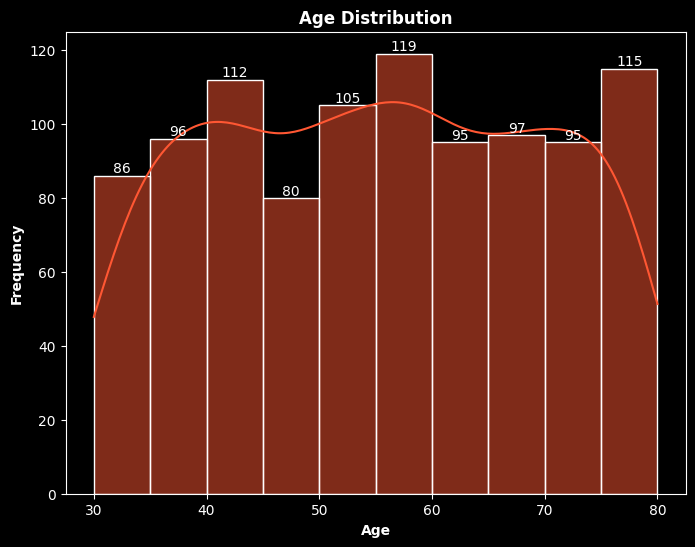

In [11]:
# Visualizing the distribution of Age
plt.figure(figsize=(8, 6))
ax = sns.histplot(data['age'], bins=10, kde=True, color='#FF5733')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Age Distribution', fontsize=12, weight='bold')
plt.xlabel('Age', fontsize=10, weight='bold')
plt.ylabel('Frequency', fontsize=10, weight='bold')
#plt.grid(True)
plt.show()

In [12]:
# Check basic information about 'BMI'
print("\nSummary Statistics for BMI:\n")
print(data['bmi'].describe())


Summary Statistics for BMI:

count    1000.000000
mean       26.003100
std         3.012387
min        17.700000
25%        23.900000
50%        26.000000
75%        28.025000
max        36.800000
Name: bmi, dtype: float64


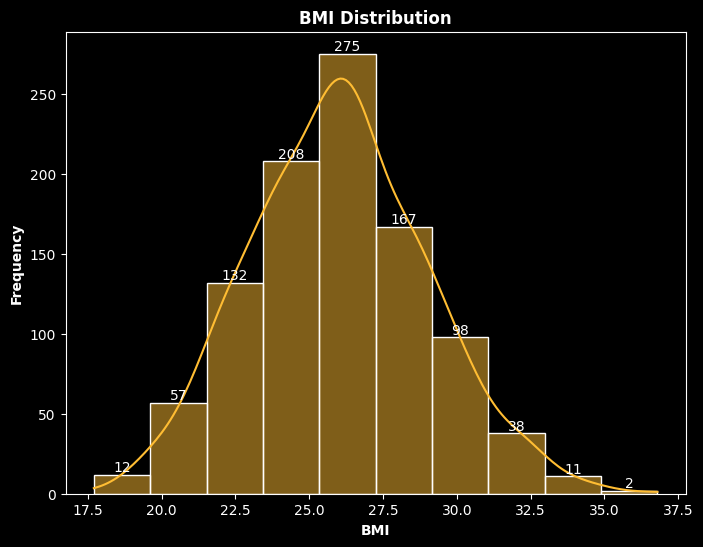

In [13]:
# Visualizing the distribution of BMI
plt.figure(figsize=(8, 6))
ax = sns.histplot(data['bmi'], bins=10, kde=True, color='#FFBD33')
for container in ax.containers:
    ax.bar_label(container)
plt.title('BMI Distribution', fontsize=12, weight='bold')
plt.xlabel('BMI', fontsize=10, weight='bold')
plt.ylabel('Frequency', fontsize=10, weight='bold')
#plt.grid(True)
plt.show()

In [14]:
# Segment BMI
bins = [0, 18.5, 25, 30, 35, np.inf]
names = ['Underweight', 'Normal weight', 'Overweight', 'Obese', 'Extremly Obese']
data['SegmentBMI'] = pd.cut(data['bmi'],bins, labels=names)
#data.drop('BMI',axis=1,inplace=True)
data.head()

,id,age,bmi,smoker,alcohol_consumption,diet_type,physical_activity_level,family_history,mental_stress_level,sleep_hours,regular_health_checkup,prostate_exam_done,risk_level,SegmentBMI
0,1,39,24.7,No,NaN,Fatty,Moderate,No,High,5.6,No,No,Medium,Normal weight
1,2,43,25.6,Yes,NaN,Mixed,High,No,High,6.9,Yes,No,Low,Overweight
2,3,72,22.4,No,Moderate,Mixed,Moderate,No,High,7.8,Yes,No,Low,Normal weight
3,4,60,25.6,Yes,NaN,Fatty,Moderate,No,High,5.6,Yes,No,Medium,Overweight
4,5,51,26.6,Yes,NaN,Mixed,Low,No,Medium,5.9,No,No,Medium,Overweight


In [15]:
### SegmentBMI Distrbution
data.SegmentBMI.value_counts().to_frame()

,count
SegmentBMI,
Overweight,539
Normal weight,370
Obese,87
Underweight,2
Extremly Obese,2


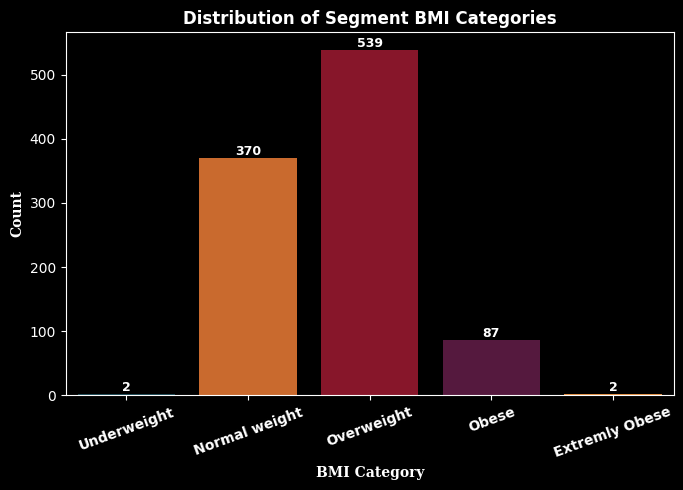

In [16]:
# Visualizing the distribution of SegmentBMI
colors = ['#0f4c5c', '#e36414', '#9a031e', '#5f0f40', '#fb8b24']
bmi_counts = data['SegmentBMI'].value_counts()
plt.figure(figsize=(7, 5))
ax = sns.barplot(x=bmi_counts.index, y=bmi_counts.values, palette=colors)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=9, weight='bold')
plt.title('Distribution of Segment BMI Categories', fontsize=12, weight='bold')
plt.xlabel('BMI Category', **font_properties)
plt.ylabel('Count', **font_properties)
plt.xticks(rotation=20, ha='center', fontweight='bold')
plt.tight_layout()

In [17]:
### Smoker Distrbution
data.smoker.value_counts().to_frame()

,count
smoker,
Yes,513
No,487


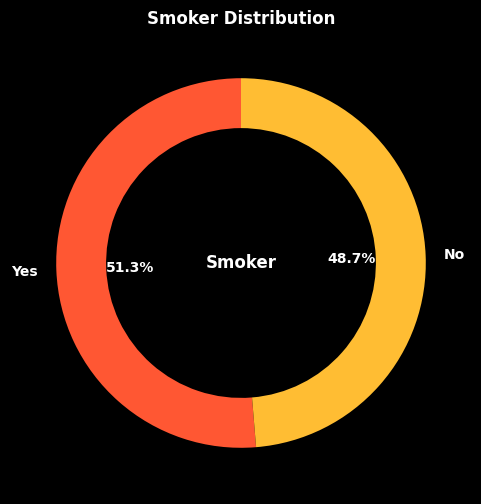

In [18]:
# Visualizing the distribution of Result
colors = ['#FF5733', '#FFBD33']
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(
    data.smoker.value_counts(), labels=data.smoker.value_counts().index, autopct='%1.1f%%', 
    startangle=90, wedgeprops={'width': 0.27}, colors=colors
)
plt.text(0, 0, 'Smoker', ha='center', va='center', fontsize=12, fontweight='bold')
plt.title("Smoker Distribution", fontsize=12, weight='bold')
plt.setp(autotexts, size=10, color="white", weight='bold')
plt.setp(texts, size=10, color="white", weight='bold')
plt.show()

In [19]:
### Alcohol Distrbution
data.alcohol_consumption.value_counts().to_frame()

,count
alcohol_consumption,
Moderate,414
High,191


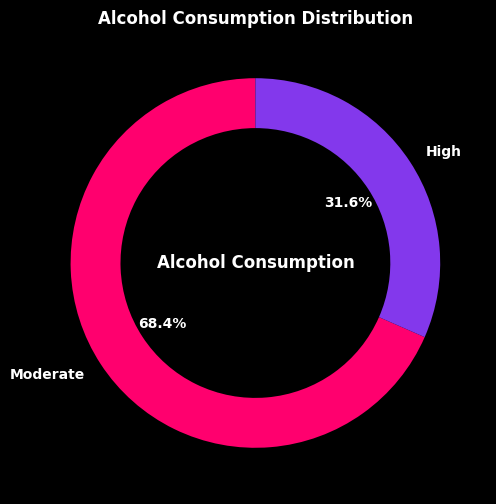

In [20]:
# Visualizing the distribution of Alcohol
colors = ['#ff006e', '#8338ec','#590d22']
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(
    data.alcohol_consumption.value_counts(), labels=data.alcohol_consumption.value_counts().index, autopct='%1.1f%%', 
    startangle=90, wedgeprops={'width': 0.27}, colors=colors
)
plt.text(0, 0, 'Alcohol Consumption', ha='center', va='center', fontsize=12, fontweight='bold')
plt.title("Alcohol Consumption Distribution", fontsize=12, weight='bold')
plt.setp(autotexts, size=10, color="white", weight='bold')
plt.setp(texts, size=10, color="white", weight='bold')
plt.show()

In [21]:
### Diet Distrbution
data.diet_type.value_counts().to_frame()

,count
diet_type,
Mixed,380
Healthy,339
Fatty,281


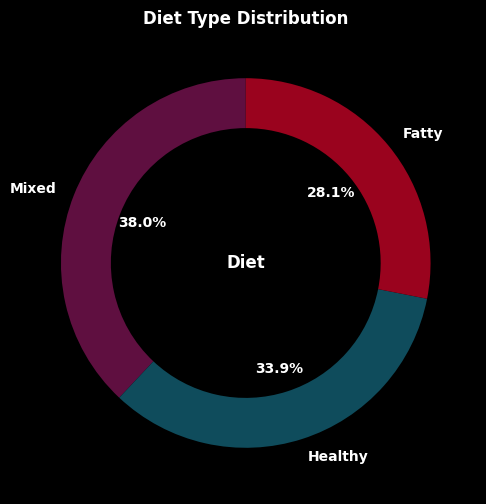

In [22]:
# Visualizing the distribution of Diet
colors = ['#5f0f40', '#0f4c5c','#9a031e']
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(
    data.diet_type.value_counts(), labels=data.diet_type.value_counts().index, autopct='%1.1f%%', 
    startangle=90, wedgeprops={'width': 0.27}, colors=colors
)
plt.text(0, 0, 'Diet', ha='center', va='center', fontsize=12, fontweight='bold')
plt.title("Diet Type Distribution", fontsize=12, weight='bold')
plt.setp(autotexts, size=10, color="white", weight='bold')
plt.setp(texts, size=10, color="white", weight='bold')
plt.show()

In [23]:
### Physical Distrbution
data.physical_activity_level.value_counts().to_frame()

,count
physical_activity_level,
Moderate,375
Low,332
High,293


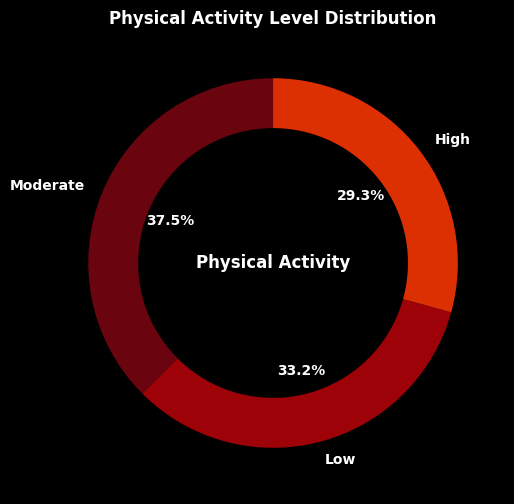

In [24]:
# Visualizing the distribution of Physical
colors = ['#6a040f', '#9d0208','#dc2f02']
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(
    data.physical_activity_level.value_counts(), labels=data.physical_activity_level.value_counts().index, autopct='%1.1f%%', 
    startangle=90, wedgeprops={'width': 0.27}, colors=colors
)
plt.text(0, 0, 'Physical Activity', ha='center', va='center', fontsize=12, fontweight='bold')
plt.title("Physical Activity Level Distribution", fontsize=12, weight='bold')
plt.setp(autotexts, size=10, color="white", weight='bold')
plt.setp(texts, size=10, color="white", weight='bold')
plt.show()

In [25]:
### Family Distrbution
data.family_history.value_counts().to_frame()

,count
family_history,
No,814
Yes,186


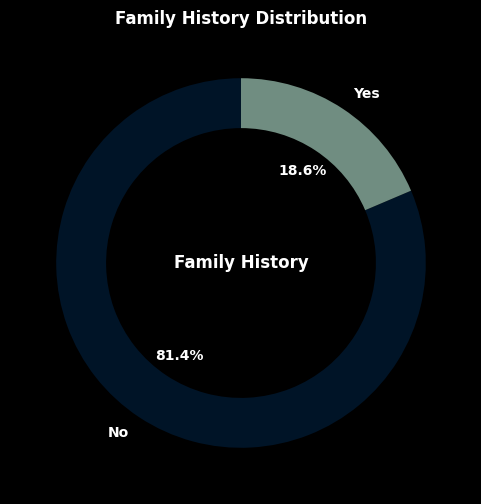

In [26]:
# Visualizing the distribution of Family
colors = ['#001427', '#708d81']
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(
    data.family_history.value_counts(), labels=data.family_history.value_counts().index, autopct='%1.1f%%', 
    startangle=90, wedgeprops={'width': 0.27}, colors=colors
)
plt.text(0, 0, 'Family History', ha='center', va='center', fontsize=12, fontweight='bold')
plt.title("Family History Distribution", fontsize=12, weight='bold')
plt.setp(autotexts, size=10, color="white", weight='bold')
plt.setp(texts, size=10, color="white", weight='bold')
plt.show()

In [27]:
### Stree Distrbution
data.mental_stress_level.value_counts().to_frame()

,count
mental_stress_level,
Medium,413
High,298
Low,289


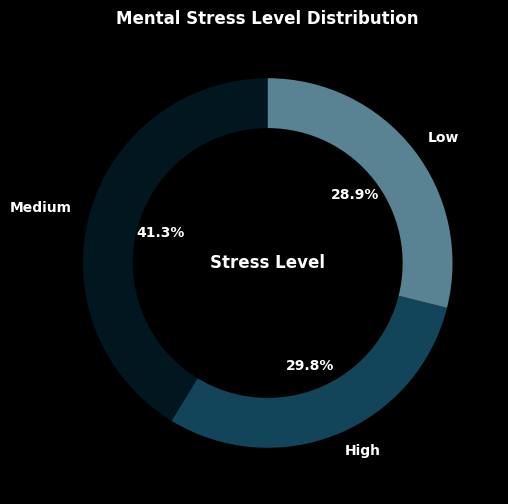

In [28]:
# Visualizing the distribution of Stress
colors = ['#01161e', '#124559','#598392']
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(
    data.mental_stress_level.value_counts(), labels=data.mental_stress_level.value_counts().index, autopct='%1.1f%%', 
    startangle=90, wedgeprops={'width': 0.27}, colors=colors
)
plt.text(0, 0, 'Stress Level', ha='center', va='center', fontsize=12, fontweight='bold')
plt.title("Mental Stress Level Distribution", fontsize=12, weight='bold')
plt.setp(autotexts, size=10, color="white", weight='bold')
plt.setp(texts, size=10, color="white", weight='bold')
plt.show()

In [29]:
# Check basic information about 'Sleep'
print("\nSummary Statistics for Sleep Hours:\n")
print(data['sleep_hours'].describe())


Summary Statistics for Sleep Hours:

count    1000.000000
mean        6.725500
std         1.320948
min         4.500000
25%         5.600000
50%         6.700000
75%         7.900000
max         9.000000
Name: sleep_hours, dtype: float64


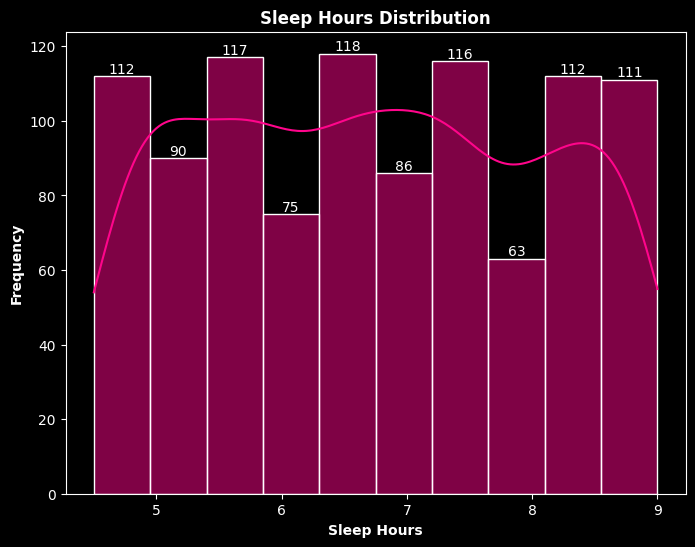

In [30]:
# Visualizing the distribution of Sleep
plt.figure(figsize=(8, 6))
ax = sns.histplot(data['sleep_hours'], bins=10, kde=True, color='#FF058B')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Sleep Hours Distribution', fontsize=12, weight='bold')
plt.xlabel('Sleep Hours', fontsize=10, weight='bold')
plt.ylabel('Frequency', fontsize=10, weight='bold')
#plt.grid(True)
plt.show()

In [31]:
### Regular Health Distrbution
data.regular_health_checkup.value_counts().to_frame()

,count
regular_health_checkup,
Yes,522
No,478


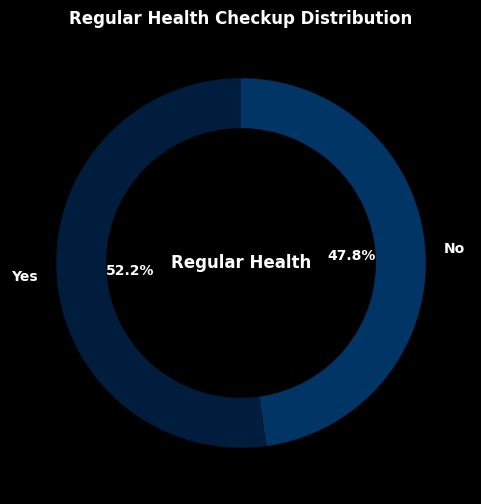

In [32]:
# Visualizing the distribution of Regular Health
colors = ['#001d3d', '#003566']
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(
    data.regular_health_checkup.value_counts(), labels=data.regular_health_checkup.value_counts().index, autopct='%1.1f%%', 
    startangle=90, wedgeprops={'width': 0.27}, colors=colors
)
plt.text(0, 0, 'Regular Health', ha='center', va='center', fontsize=12, fontweight='bold')
plt.title("Regular Health Checkup Distribution", fontsize=12, weight='bold')
plt.setp(autotexts, size=10, color="white", weight='bold')
plt.setp(texts, size=10, color="white", weight='bold')
plt.show()

In [33]:
### Prostate Exam Distrbution
data.prostate_exam_done.value_counts().to_frame()

,count
prostate_exam_done,
No,675
Yes,325


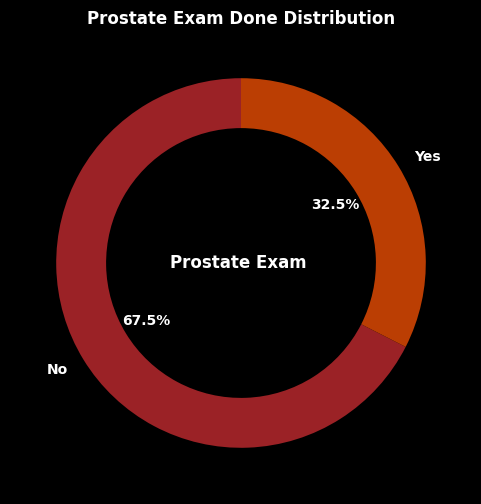

In [34]:
# Visualizing the distribution of Prostate Exam 
colors = ['#9b2226', '#bb3e03']
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(
    data.prostate_exam_done.value_counts(), labels=data.prostate_exam_done.value_counts().index, autopct='%1.1f%%', 
    startangle=90, wedgeprops={'width': 0.27}, colors=colors
)
plt.text(0, 0, 'Prostate Exam ', ha='center', va='center', fontsize=12, fontweight='bold')
plt.title("Prostate Exam Done Distribution", fontsize=12, weight='bold')
plt.setp(autotexts, size=10, color="white", weight='bold')
plt.setp(texts, size=10, color="white", weight='bold')
plt.show()

In [35]:
### Risk Distrbution
data.risk_level.value_counts().to_frame()

,count
risk_level,
Low,567
Medium,391
High,42


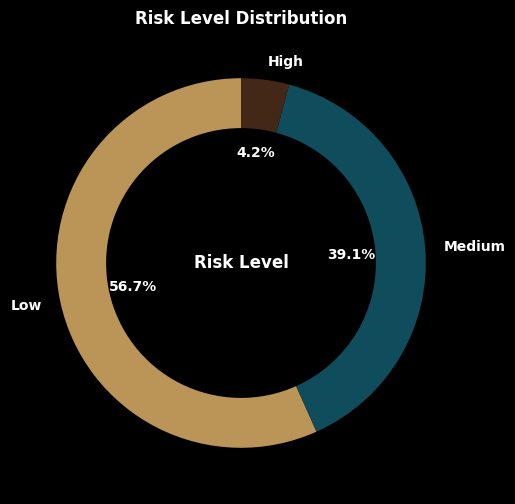

In [36]:
# Visualizing the distribution of Risk
colors = ['#bb9457', '#0f4c5c','#432818']
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(
    data.risk_level.value_counts(), labels=data.risk_level.value_counts().index, autopct='%1.1f%%', 
    startangle=90, wedgeprops={'width': 0.27}, colors=colors
)
plt.text(0, 0, 'Risk Level', ha='center', va='center', fontsize=12, fontweight='bold')
plt.title("Risk Level Distribution", fontsize=12, weight='bold')
plt.setp(autotexts, size=10, color="white", weight='bold')
plt.setp(texts, size=10, color="white", weight='bold')
plt.show()

<center><span style="font-family:Palatino; font-size:22px;"><i> Graph Show  <span style="color:#DC143C;">Dataset</span> Imbalanced</i></span> </center>


In [37]:
category_columns = data.select_dtypes(include="O").columns
category_columns

Index(['smoker', 'alcohol_consumption', 'diet_type', 'physical_activity_level',
       'family_history', 'mental_stress_level', 'regular_health_checkup',
       'prostate_exam_done', 'risk_level'],
      dtype='object')

In [38]:
numeric_columns = data.select_dtypes(include="number").columns.tolist()
numeric_columns

['id', 'age', 'bmi', 'sleep_hours']

In [39]:
for col in category_columns[:-1]:  
    grouped_df = data.groupby(['risk_level', col])[col].count().reset_index(name='Count')
    print(f"\n🔎 Distribution of '{col}' by Risk Level:\n")
    print(grouped_df)


🔎 Distribution of 'smoker' by Risk Level:

  risk_level smoker  Count
0       High     No      5
1       High    Yes     37
2        Low     No    349
3        Low    Yes    218
4     Medium     No    133
5     Medium    Yes    258

🔎 Distribution of 'alcohol_consumption' by Risk Level:

  risk_level alcohol_consumption  Count
0       High                High     21
1       High            Moderate      9
2        Low                High     61
3        Low            Moderate    259
4     Medium                High    109
5     Medium            Moderate    146

🔎 Distribution of 'diet_type' by Risk Level:

  risk_level diet_type  Count
0       High     Fatty     28
1       High   Healthy      9
2       High     Mixed      5
3        Low     Fatty    109
4        Low   Healthy    222
5        Low     Mixed    236
6     Medium     Fatty    144
7     Medium   Healthy    108
8     Medium     Mixed    139

🔎 Distribution of 'physical_activity_level' by Risk Level:

  risk_level physical_

In [40]:
def format_column_name(col_name):
    parts = col_name.split('_')
    return ' '.join(part.capitalize() for part in parts)

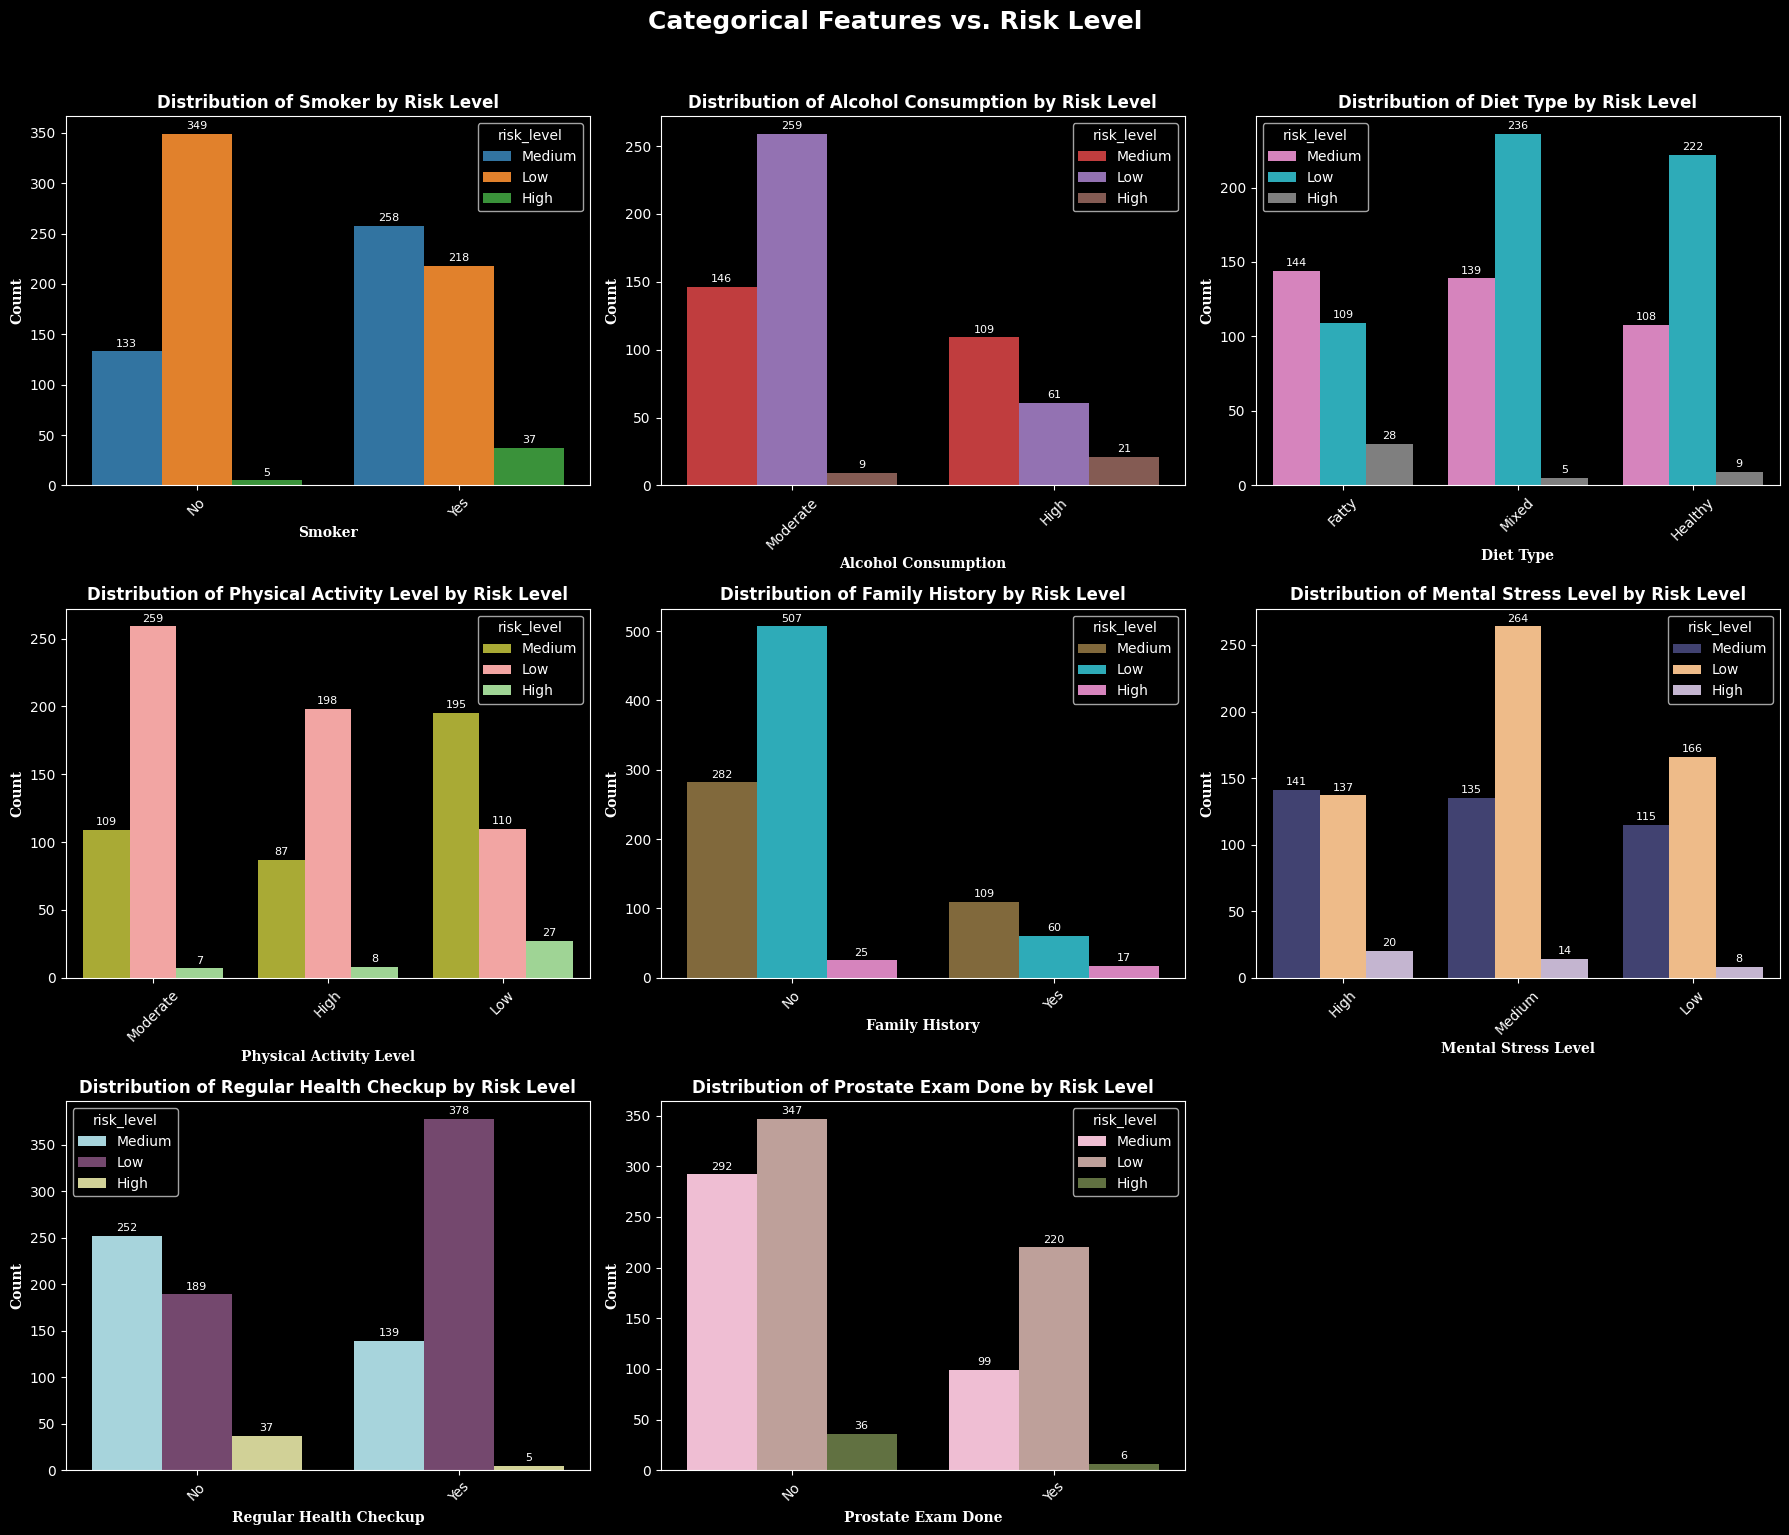

In [41]:
n_cols = 3
n_rows = (len(category_columns[:-1]) + n_cols - 1) // n_cols
color_palettes = [
    ["#1f77b4", "#ff7f0e", "#2ca02c"], 
    ["#d62728", "#9467bd", "#8c564b"], 
    ["#e377c2", "#17becf", "#7f7f7f"], 
    ["#bcbd22", "#ff9896", "#98df8a"], 
    ["#8c6d31", "#17becf", "#e377c2"],  
    ["#393b79", "#ffbb78", "#c5b0d5"],  
    ["#9edae5", "#7b4173", "#dbdb8d"],  
    ["#f7b6d2", "#c49c94", "#637939"]   
]
plt.figure(figsize=(n_cols * 6, n_rows * 5))
for idx, col in enumerate(category_columns[:-1], 1):
    ax = plt.subplot(n_rows, n_cols, idx)
    palette = color_palettes[idx - 1]
    chart = sns.countplot(data=data, x=col, hue='risk_level', palette=palette, ax=ax)   
    for container in ax.containers:
        ax.bar_label(container, fontsize=8, padding=2)
    col = format_column_name(col)
    ax.set_title(f"Distribution of {col} by Risk Level", fontsize=12, weight='bold')
    ax.set_xlabel(col, fontdict=font_properties)
    ax.set_ylabel("Count", fontdict=font_properties)
    ax.tick_params(axis='x', rotation=45)
plt.suptitle("Categorical Features vs. Risk Level", fontsize=18, weight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [42]:
for col in numeric_columns[1:-1]:
    grouped_stats = data.groupby('risk_level')[col].describe().reset_index()
    print(f"\n📌 Descriptive Statistics for '{col}' by Risk Level:\n")
    print(grouped_stats)


📌 Descriptive Statistics for 'age' by Risk Level:

  risk_level  count       mean        std   min   25%   50%    75%   max
0       High   42.0  60.214286  11.765049  34.0  56.0  59.5  69.25  80.0
1        Low  567.0  53.827160  14.126702  30.0  42.0  53.0  66.00  80.0
2     Medium  391.0  56.547315  14.823308  30.0  44.0  58.0  69.50  80.0

📌 Descriptive Statistics for 'bmi' by Risk Level:

  risk_level  count       mean       std   min   25%    50%     75%   max
0       High   42.0  26.957143  2.534267  20.9  25.1  27.05  28.775  31.2
1        Low  567.0  25.665432  2.896703  18.2  23.6  25.80  27.400  36.8
2     Medium  391.0  26.390281  3.158766  17.7  24.3  26.20  28.600  34.4


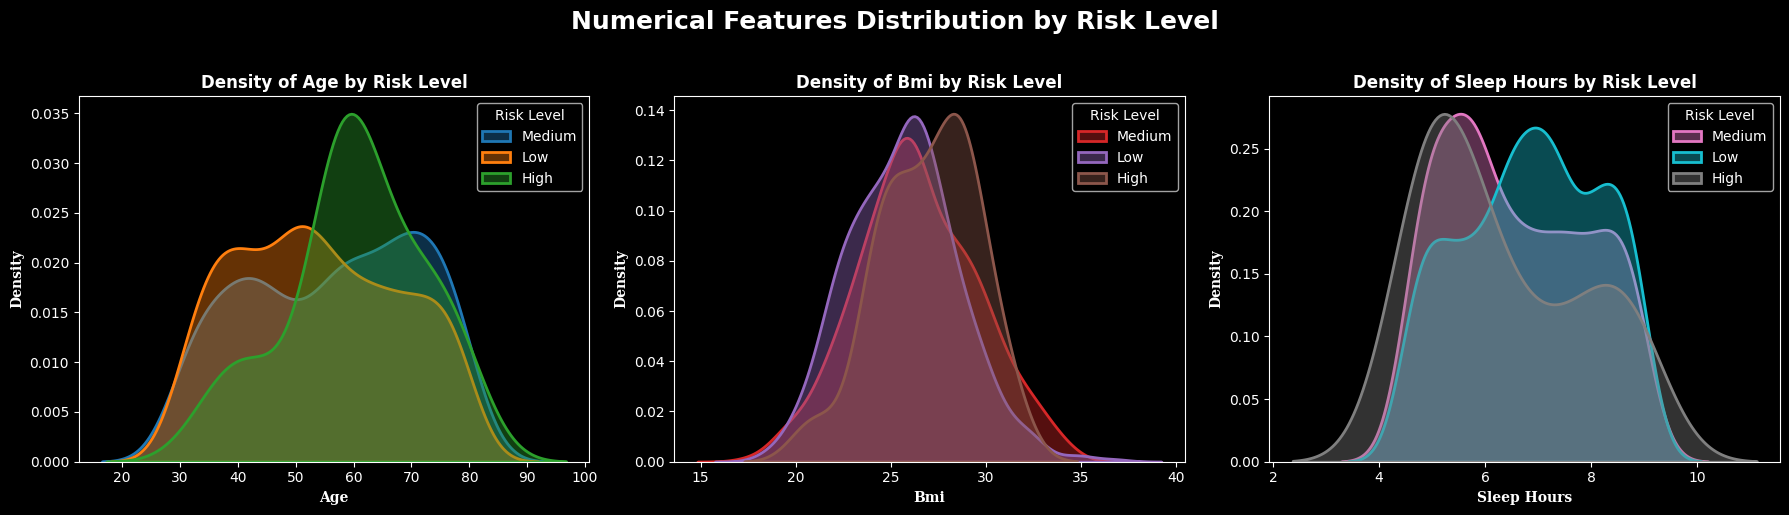

In [43]:
n_cols = 3
n_rows = 1
color_palettes = [
    ["#1f77b4", "#ff7f0e", "#2ca02c"], 
    ["#d62728", "#9467bd", "#8c564b"], 
    ["#e377c2", "#17becf", "#7f7f7f"]
]
plt.figure(figsize=(n_cols * 6, n_rows * 5))
for idx, col in enumerate(numeric_columns[1:], 1):
    ax = plt.subplot(n_rows, n_cols, idx)
    palette = color_palettes[idx - 1]
    for i, risk in enumerate(data['risk_level'].unique()):
        sns.kdeplot(
            data=data[data['risk_level'] == risk],
            x=col,
            fill=True,
            common_norm=False,
            alpha=0.4,
            linewidth=2,
            label=str(risk),
            color=palette[i % len(palette)],
            ax=ax
        )
    ax.set_title(f"Density of {format_column_name(col)} by Risk Level", fontsize=12, weight='bold')
    ax.set_xlabel(format_column_name(col), fontdict=font_properties)
    ax.set_ylabel("Density", fontdict=font_properties)
    ax.legend(title="Risk Level")
plt.suptitle("Numerical Features Distribution by Risk Level", fontsize=18, weight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [44]:
print("\nANOVA Test Results Based on Risk Level (High vs Medium vs Low):")
# Loop through each numeric feature
for col in numeric_columns[1:]:
    high_group = data[data['risk_level'] == 'High'][col]
    medium_group = data[data['risk_level'] == 'Medium'][col]
    low_group = data[data['risk_level'] == 'Low'][col]
    # Drop NaNs just in case
    high_group = high_group.dropna()
    medium_group = medium_group.dropna()
    low_group = low_group.dropna()
    try:
        f_stat, p_value = f_oneway(high_group, medium_group, low_group)
        print(f"\n{col}: F-statistic = {f_stat:.2f}, p-value = {p_value:.4f}")
        if p_value < 0.05:
            print(f"    ➤ Significant differences found among risk levels for: {col}")
        else:
            print(f"    ➤ No significant differences among risk levels for: {col}")
    except Exception as e:
        print(f"\n{col}: Skipped due to error -> {e}")


ANOVA Test Results Based on Risk Level (High vs Medium vs Low):

age: F-statistic = 6.91, p-value = 0.0010
    ➤ Significant differences found among risk levels for: age

bmi: F-statistic = 9.04, p-value = 0.0001
    ➤ Significant differences found among risk levels for: bmi

sleep_hours: F-statistic = 7.49, p-value = 0.0006
    ➤ Significant differences found among risk levels for: sleep_hours


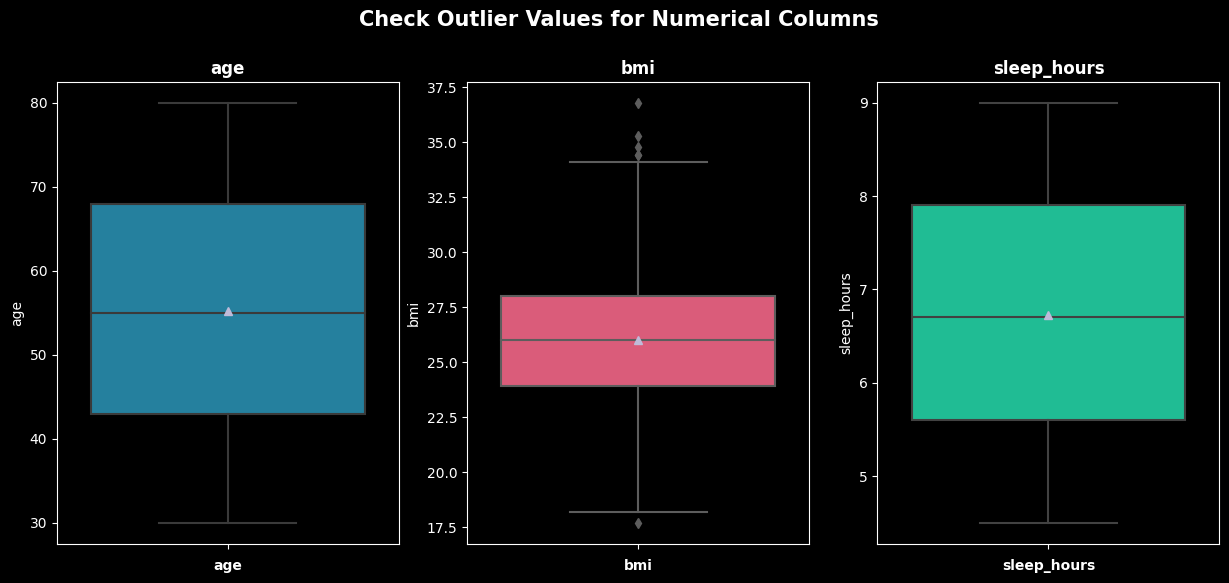

In [45]:
plt.figure(figsize=(15, 6))
colors = ['#118ab2', '#ef476f', '#06d6a0']
for i, column in enumerate(numeric_columns[1:]):
    plt.subplot(1, 3, i + 1) 
    sns.boxplot(y=data[column], color=colors[i], showmeans=True)
    plt.title(column, fontsize=12, weight='bold')
    plt.xlabel(column, fontsize=10, weight='bold')
    #plt.grid(True)
plt.suptitle("Check Outlier Values for Numerical Columns", fontsize=15, weight='bold', y=1)
plt.show()

In [46]:
# Handle Outliers 
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for numerical columns
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1
# Remove outliers based on the IQR rule
# Keep only rows where numerical column values are within 1.5 * IQR
# Replace outliers with lower or upper bound
for col in numeric_columns[1:]:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    data[col] = np.where(
        data[col] < lower_bound,  # If value is below the lower bound
        lower_bound,             # Replace with lower bound
        np.where(
            data[col] > upper_bound,  # If value is above the upper bound
            upper_bound,              # Replace with upper bound
            data[col]                 # Otherwise, keep the original value
        )
    )
data.head()

,id,age,bmi,smoker,alcohol_consumption,diet_type,physical_activity_level,family_history,mental_stress_level,sleep_hours,regular_health_checkup,prostate_exam_done,risk_level,SegmentBMI
0,1,39.0,24.7,No,NaN,Fatty,Moderate,No,High,5.6,No,No,Medium,Normal weight
1,2,43.0,25.6,Yes,NaN,Mixed,High,No,High,6.9,Yes,No,Low,Overweight
2,3,72.0,22.4,No,Moderate,Mixed,Moderate,No,High,7.8,Yes,No,Low,Normal weight
3,4,60.0,25.6,Yes,NaN,Fatty,Moderate,No,High,5.6,Yes,No,Medium,Overweight
4,5,51.0,26.6,Yes,NaN,Mixed,Low,No,Medium,5.9,No,No,Medium,Overweight


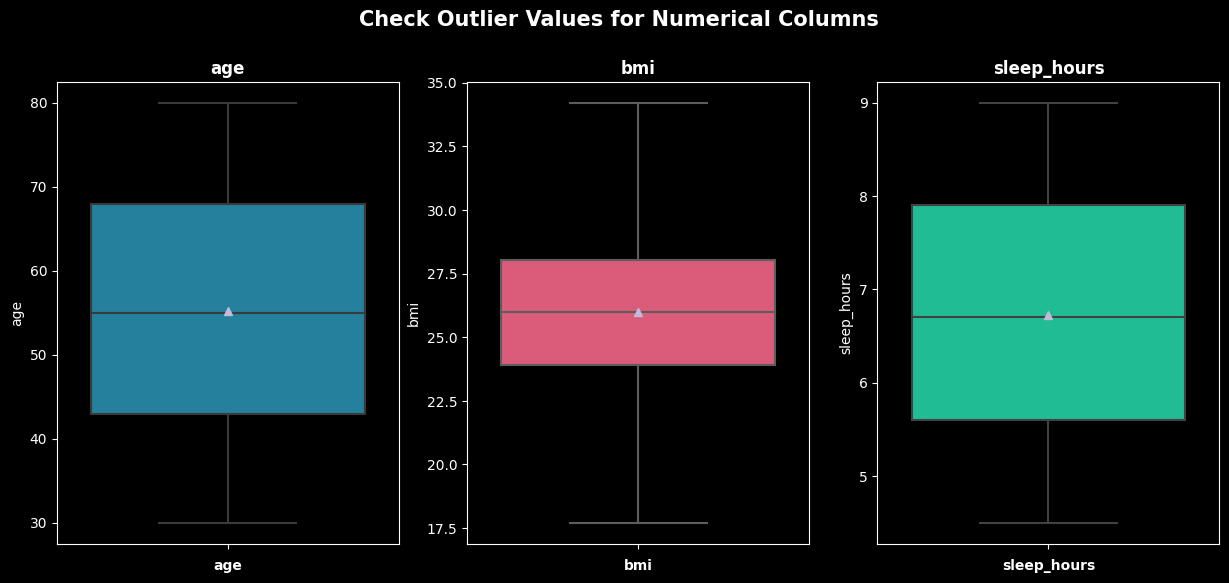

In [47]:
plt.figure(figsize=(15, 6))
colors = ['#118ab2', '#ef476f', '#06d6a0']
for i, column in enumerate(numeric_columns[1:]):
    plt.subplot(1, 3, i + 1) 
    sns.boxplot(y=data[column], color=colors[i], showmeans=True)
    plt.title(column, fontsize=12, weight='bold')
    plt.xlabel(column, fontsize=10, weight='bold')
    #plt.grid(True)
plt.suptitle("Check Outlier Values for Numerical Columns", fontsize=15, weight='bold', y=1)
plt.show()

<a id="4"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Preprocessing</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [48]:
columns = data.select_dtypes(include=['category','object']).columns
columns

Index(['smoker', 'alcohol_consumption', 'diet_type', 'physical_activity_level',
       'family_history', 'mental_stress_level', 'regular_health_checkup',
       'prostate_exam_done', 'risk_level', 'SegmentBMI'],
      dtype='object')

In [49]:
### Transform Object Columns into Numbers
label = LabelEncoder()
for col in columns:
    data[col] = label.fit_transform(data[col])
data.head()

,id,age,bmi,smoker,alcohol_consumption,diet_type,physical_activity_level,family_history,mental_stress_level,sleep_hours,regular_health_checkup,prostate_exam_done,risk_level,SegmentBMI
0,1,39.0,24.7,0,2,0,2,0,0,5.6,0,0,2,1
1,2,43.0,25.6,1,2,2,0,0,0,6.9,1,0,1,3
2,3,72.0,22.4,0,1,2,2,0,0,7.8,1,0,1,1
3,4,60.0,25.6,1,2,0,2,0,0,5.6,1,0,2,3
4,5,51.0,26.6,1,2,2,1,0,2,5.9,0,0,2,3


In [50]:
### Show Correlation
data.drop("id",axis=1,inplace=True)
corr = data.corr()
corr

,age,bmi,smoker,alcohol_consumption,diet_type,physical_activity_level,family_history,mental_stress_level,sleep_hours,regular_health_checkup,prostate_exam_done,risk_level,SegmentBMI
age,1.000000,-0.012190,-0.036915,-0.010305,0.059947,0.004269,-0.011352,0.044808,-0.040334,0.048961,0.468654,0.041164,0.060917
bmi,-0.012190,1.000000,0.037741,0.011549,0.010297,0.015845,0.007275,-0.027548,-0.034106,-0.026832,0.019393,0.067448,0.593236
smoker,-0.036915,0.037741,1.000000,0.009078,0.020362,-0.000162,-0.058708,-0.064655,0.005180,0.040909,-0.067170,0.150496,0.042902
alcohol_consumption,-0.010305,0.011549,0.009078,1.000000,0.008069,0.027120,0.000195,0.025214,-0.015298,0.047515,-0.018230,-0.085511,0.029380
diet_type,0.059947,0.010297,0.020362,0.008069,1.000000,0.028774,0.068746,-0.012439,0.053664,-0.019048,-0.011046,-0.036766,-0.014045
physical_activity_level,0.004269,0.015845,-0.000162,0.027120,0.028774,1.000000,-0.026079,0.024393,0.012117,-0.031521,0.021923,-0.012384,0.035253
family_history,-0.011352,0.007275,-0.058708,0.000195,0.068746,-0.026079,1.000000,0.008030,-0.006507,-0.000473,0.003018,0.124783,0.001536
mental_stress_level,0.044808,-0.027548,-0.064655,0.025214,-0.012439,0.024393,0.008030,1.000000,-0.014718,-0.000072,0.057828,-0.086128,-0.047333
sleep_hours,-0.040334,-0.034106,0.005180,-0.015298,0.053664,0.012117,-0.006507,-0.014718,1.000000,-0.033375,-0.074690,-0.055938,-0.036406
regular_health_checkup,0.048961,-0.026832,0.040909,0.047515,-0.019048,-0.031521,-0.000473,-0.000072,-0.033375,1.000000,0.061335,-0.172894,-0.000461


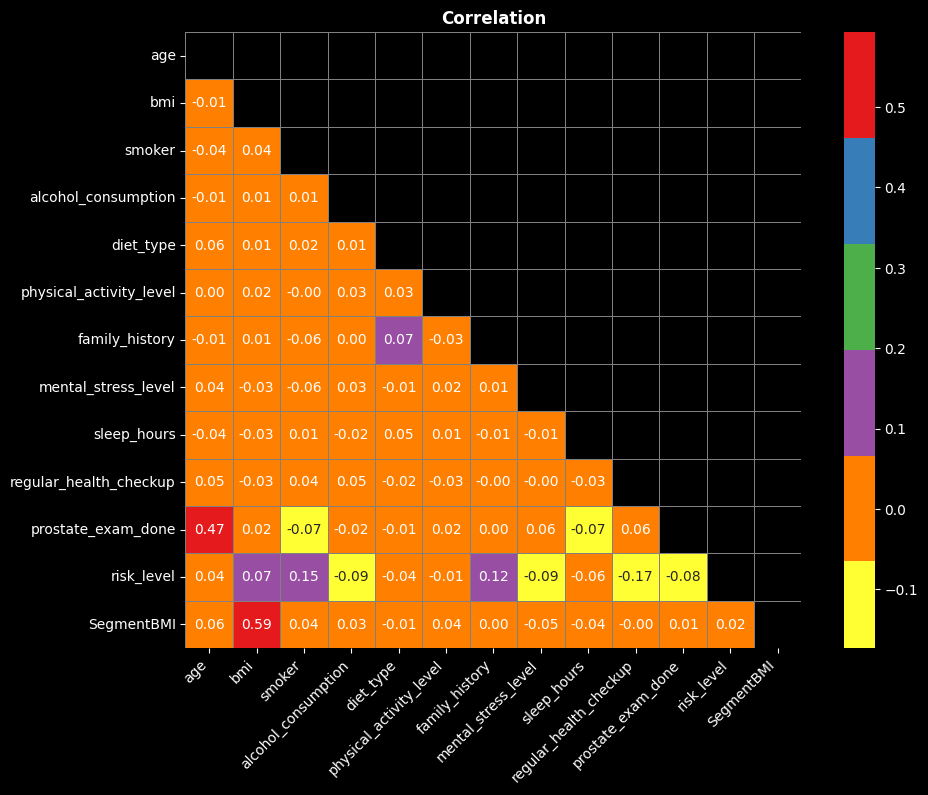

In [51]:
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(11, 8))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Set1_r', 
            cbar=True, square=True, linewidths=0.5, 
            linecolor='gray', center=0)
plt.title('Correlation', fontsize=12, weight='bold')
#plt.yticks(rotation=45, ha='right') 
plt.xticks(rotation=45, ha='right') 
ax.set_xticks(range(len(data.columns))) 
ax.set_yticks(range(len(data.columns))) 
ax.set_xticklabels(data.columns, fontdict=font_properties)
ax.set_yticklabels(data.columns, fontdict=font_properties)
plt.show()

In [52]:
risk_corr = corr['risk_level'].drop('risk_level')
risk_corr

age                        0.041164
bmi                        0.067448
smoker                     0.150496
alcohol_consumption       -0.085511
diet_type                 -0.036766
physical_activity_level   -0.012384
family_history             0.124783
mental_stress_level       -0.086128
sleep_hours               -0.055938
regular_health_checkup    -0.172894
prostate_exam_done        -0.078172
SegmentBMI                 0.022756
Name: risk_level, dtype: float64

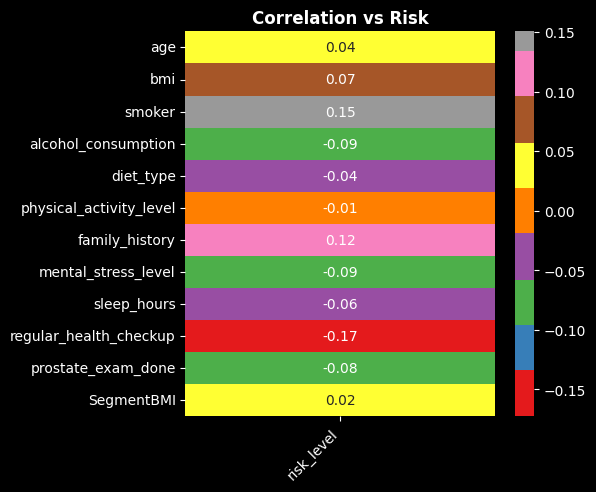

In [53]:
plt.figure(figsize=(5, 5))
risk_corr_df = pd.DataFrame(risk_corr)
sns.heatmap(risk_corr_df, annot=True, fmt=".2f", cmap='Set1', 
            linecolor='gray', center=0)
plt.title('Correlation vs Risk', fontsize=12, weight='bold')
#plt.yticks(rotation=45, ha='right') 
plt.xticks(rotation=45, ha='right') 
ax.set_yticklabels(data.columns, fontdict=font_properties)
plt.show()

In [54]:
### Split 
X = data.drop(['risk_level','SegmentBMI'],axis=1)
y = data['risk_level']
keys = X.columns
X.head()

,age,bmi,smoker,alcohol_consumption,diet_type,physical_activity_level,family_history,mental_stress_level,sleep_hours,regular_health_checkup,prostate_exam_done
0,39.0,24.7,0,2,0,2,0,0,5.6,0,0
1,43.0,25.6,1,2,2,0,0,0,6.9,1,0
2,72.0,22.4,0,1,2,2,0,0,7.8,1,0
3,60.0,25.6,1,2,0,2,0,0,5.6,1,0
4,51.0,26.6,1,2,2,1,0,2,5.9,0,0


In [55]:
y.head()

0    2
1    1
2    1
3    2
4    2
Name: risk_level, dtype: int64

In [56]:
### Scaling
scale = MinMaxScaler()
X = scale.fit_transform(X)
X = pd.DataFrame(X,columns=keys)
X.head()

,age,bmi,smoker,alcohol_consumption,diet_type,physical_activity_level,family_history,mental_stress_level,sleep_hours,regular_health_checkup,prostate_exam_done
0,0.18,0.423485,0.0,1.0,0.0,1.0,0.0,0.0,0.244444,0.0,0.0
1,0.26,0.478030,1.0,1.0,1.0,0.0,0.0,0.0,0.533333,1.0,0.0
2,0.84,0.284091,0.0,0.5,1.0,1.0,0.0,0.0,0.733333,1.0,0.0
3,0.60,0.478030,1.0,1.0,0.0,1.0,0.0,0.0,0.244444,1.0,0.0
4,0.42,0.538636,1.0,1.0,1.0,0.5,0.0,1.0,0.311111,0.0,0.0


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle =True,stratify=y)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (800, 11)
X_test shape is  (200, 11)
y_train shape is  (800,)
y_test shape is  (200,)


<a id="5"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">ML Models</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [58]:
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(),
    'LGBM': LGBMClassifier(verbose=-1),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(probability=True,random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42),
    'CatBoost': CatBoostClassifier(logging_level='Silent'),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'NaiveBayes': GaussianNB()
}
### Validation Score
cv_results = {}
for model_name, model in models.items():
    print(f"Cross-validating {model_name}...")
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,verbose=0)
    cv_results[model_name] = cv_scores.mean()
    print(f"Mean accuracy for {model_name}: {cv_scores.mean():.4f}")

Cross-validating RandomForest...
Mean accuracy for RandomForest: 0.8250
Cross-validating XGBoost...
Mean accuracy for XGBoost: 0.8450
Cross-validating LGBM...
Mean accuracy for LGBM: 0.8562
Cross-validating DecisionTree...
Mean accuracy for DecisionTree: 0.7250
Cross-validating KNN...
Mean accuracy for KNN: 0.7388
Cross-validating SVC...
Mean accuracy for SVC: 0.8075
Cross-validating LogisticRegression...
Mean accuracy for LogisticRegression: 0.7688
Cross-validating CatBoost...
Mean accuracy for CatBoost: 0.9050
Cross-validating GradientBoosting...
Mean accuracy for GradientBoosting: 0.8637
Cross-validating AdaBoost...
Mean accuracy for AdaBoost: 0.8825
Cross-validating NaiveBayes...
Mean accuracy for NaiveBayes: 0.7725


In [59]:
cv_results_df = pd.DataFrame(list(cv_results.items()), columns=['Model', 'Mean Accuracy'])
cv_results_df = cv_results_df.sort_values(by='Mean Accuracy', ascending=False)
cv_results_df

,Model,Mean Accuracy
7,CatBoost,0.90500
9,AdaBoost,0.88250
8,GradientBoosting,0.86375
2,LGBM,0.85625
1,XGBoost,0.84500
0,RandomForest,0.82500
5,SVC,0.80750
10,NaiveBayes,0.77250
6,LogisticRegression,0.76875
4,KNN,0.73875


In [60]:
best_model_name = cv_results_df.iloc[0]['Model']
print(f"\nBest model from CV: {best_model_name}")


Best model from CV: CatBoost


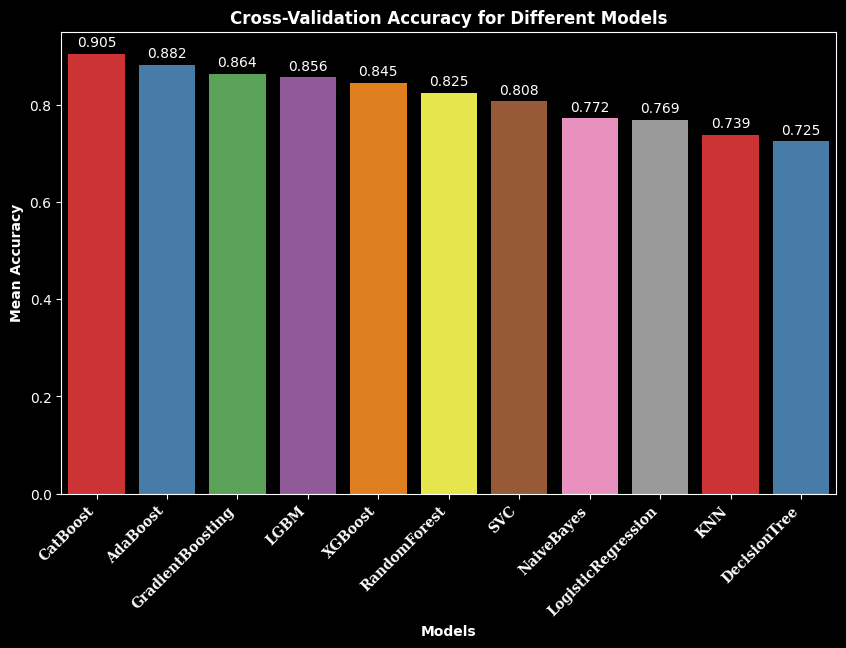

In [61]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=cv_results_df, x='Model', y='Mean Accuracy', palette='Set1')
ax.set_title('Cross-Validation Accuracy for Different Models', fontsize=12, weight='bold', loc='center')
ax.set_xlabel('Models', fontsize=10, weight='bold')
ax.set_ylabel('Mean Accuracy', fontsize=10, weight='bold')
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height():.3f}' for v in container], padding=3)
plt.xticks(rotation=45,ha='right') 
ax.set_xticklabels(cv_results_df.Model, fontdict=font_properties)
plt.show()

In [62]:
param_grids = { 
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': [2, 5, 10]
    },
    'XGBoost': {
        'max_depth': [3, 5, 7, 10, 20, 30, 40],
        'n_estimators': [50, 100, 200],
        'subsample': [0.6, 0.8, 1],
        'learning_rate': [0.05, 0.1, 0.5,1]
    },
    'LGBM': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10, 20, 30, 40],
        'learning_rate': [0.05, 0.1, 0.5,1]
    },
    'DecisionTree': {
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': [2, 5, 10]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'LogisticRegression': {
        'C': [0.01, 0.1, 1, 10,20,1000],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'CatBoost': {
        'iterations': [100, 200],
        'learning_rate': [0.05, 0.1,.5,1],
        'depth': [6, 10, 15, 20, 25, 30, 40]
    },
    'GradientBoosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.05, 0.1,.5,1],
        'max_depth': [None, 10, 20, 30, 40]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.05, 0.1,.5,1]
    },
    'NaiveBayes': {}
}

best_results = []
for model_name, model in models.items():
    print(f"\nPerforming GridSearchCV for {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_results.append({'Model': model_name, 'Best Score': best_score, 'Best Params': best_params})
    print(f"\nBest parameters for {model_name}: {best_params}")
    print(f"Best cross-validation score for {model_name}: {best_score:.4f}")


Performing GridSearchCV for RandomForest...

Best parameters for RandomForest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score for RandomForest: 0.8300

Performing GridSearchCV for XGBoost...

Best parameters for XGBoost: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.6}
Best cross-validation score for XGBoost: 0.9125

Performing GridSearchCV for LGBM...

Best parameters for LGBM: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 200}
Best cross-validation score for LGBM: 0.8763

Performing GridSearchCV for DecisionTree...

Best parameters for DecisionTree: {'max_depth': None, 'min_samples_split': 2}
Best cross-validation score for DecisionTree: 0.7250

Performing GridSearchCV for KNN...

Best parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}
Best cross-validation score for KNN: 0.7688

Performing GridSearchCV for SVC...

Best parameters for SVC: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best c

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 


Best parameters for LogisticRegression: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation score for LogisticRegression: 0.7775

Performing GridSearchCV for CatBoost...

Best parameters for CatBoost: {'depth': 6, 'iterations': 200, 'learning_rate': 0.1}
Best cross-validation score for CatBoost: 0.9100

Performing GridSearchCV for GradientBoosting...

Best parameters for GradientBoosting: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 50}
Best cross-validation score for GradientBoosting: 0.7288

Performing GridSearchCV for AdaBoost...

Best parameters for AdaBoost: {'learning_rate': 0.5, 'n_estimators': 200}
Best cross-validation score for AdaBoost: 0.9112

Performing GridSearchCV for NaiveBayes...

Best parameters for NaiveBayes: {}
Best cross-validation score for NaiveBayes: 0.7725


In [63]:
best_results_df = pd.DataFrame(best_results)
best_results_df = best_results_df.sort_values(by='Best Score', ascending=False)
best_results_df

,Model,Best Score,Best Params
1,XGBoost,0.91250,"{'learning_rate': 0.5, 'max_depth': 3, 'n_esti..."
9,AdaBoost,0.91125,"{'learning_rate': 0.5, 'n_estimators': 200}"
7,CatBoost,0.91000,"{'depth': 6, 'iterations': 200, 'learning_rate..."
2,LGBM,0.87625,"{'learning_rate': 0.5, 'max_depth': 10, 'n_est..."
5,SVC,0.84250,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}"
0,RandomForest,0.83000,"{'max_depth': 10, 'min_samples_split': 2, 'n_e..."
6,LogisticRegression,0.77750,"{'C': 10, 'penalty': 'l2', 'solver': 'saga'}"
10,NaiveBayes,0.77250,{}
4,KNN,0.76875,"{'n_neighbors': 7, 'weights': 'distance'}"
8,GradientBoosting,0.72875,"{'learning_rate': 0.5, 'max_depth': 10, 'n_est..."


In [64]:
best_model_name, best_model_param = best_results_df.iloc[0]['Model'],best_results_df.iloc[0]['Best Params']
print(f"\nBest model : {best_model_name}")
print(f"\nBest Parameters : {best_model_param}")


Best model : XGBoost

Best Parameters : {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.6}


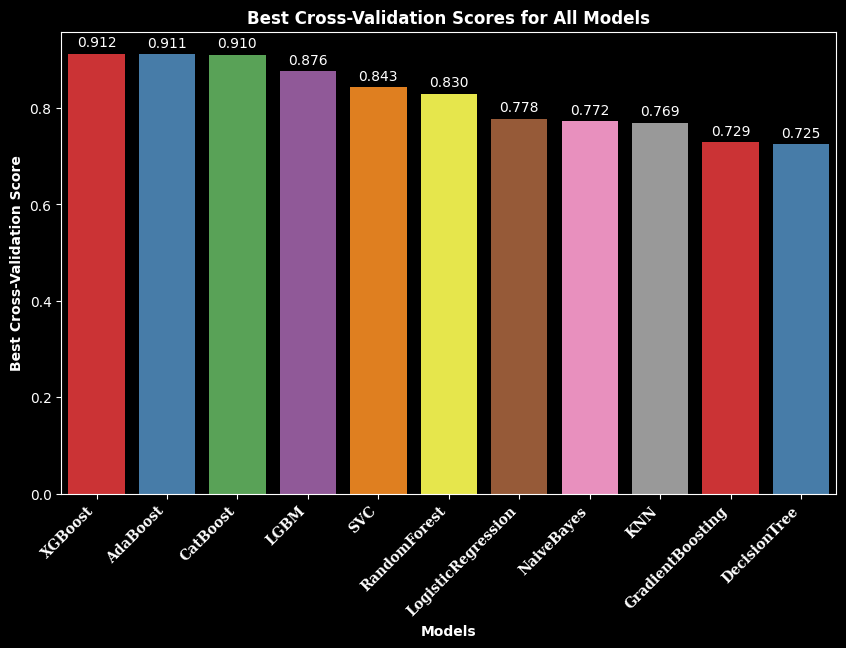

In [65]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=best_results_df, x='Model', y='Best Score', palette='Set1')
ax.set_title('Best Cross-Validation Scores for All Models', fontsize=12, weight='bold', loc='center')
ax.set_xlabel('Models', fontsize=10, weight='bold')
ax.set_ylabel('Best Cross-Validation Score', fontsize=10, weight='bold')
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height():.3f}' for v in container], padding=3)
plt.xticks(rotation=45,ha='right') 
ax.set_xticklabels(best_results_df.Model, fontdict=font_properties)
plt.show()

In [66]:
########## Training Models With Best Parameters
metrics_dict = {}
# Function to train and evaluate the model
def train_and_evaluate_model(model, model_name, X_train, y_train, X_test, y_test,feature_names=keys.tolist()):
    # Train the model
    model.fit(X_train, y_train)
    # Predictions for training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    # Training metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    # Test metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    # Print evaluation metrics
    print(f"\n{model_name} - Training Accuracy: {train_accuracy:.3f}")
    print(f"{model_name} - Test Accuracy: {test_accuracy:.3f}")
    print(f"{model_name} - Training Precision: {train_precision:.3f}")
    print(f"{model_name} - Test Precision: {test_precision:.3f}")
    print(f"{model_name} - Training Recall: {train_recall:.3f}")
    print(f"{model_name} - Test Recall: {test_recall:.3f}")
    print(f"{model_name} - Training F1 Score: {train_f1:.3f}")
    print(f"{model_name} - Test F1 Score: {test_f1:.3f}")
    # Confusion matrix and classification report
    cm = confusion_matrix(y_test, y_test_pred)
    print(f'\n{model_name} - Confusion Matrix:\n', cm)
    # Plot confusion matrix as a heatmap
    names = ["Low", "Medium", "High"]
    plt.figure(figsize=(8, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", xticklabels=names, yticklabels=names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    # Print the classification report and confusion matrix
    classification_report_str = classification_report(y_test, y_test_pred, target_names=names)
    print(f'\n{model_name} - Classification Report:\n', classification_report_str)
    # Store metrics in the dictionary
    metrics_dict[model_name] = {
        'Train Accuracy': train_accuracy,
        'Train Precision': train_precision,
        'Train Recall': train_recall,
        'Train F1': train_f1,
        'Test Accuracy': test_accuracy,
        'Test Precision': test_precision,
        'Test Recall': test_recall,
        'Test F1': test_f1
    }
    # Return the trained model
    return model


RandomForest - Training Accuracy: 0.999
RandomForest - Test Accuracy: 0.860
RandomForest - Training Precision: 0.999
RandomForest - Test Precision: 0.826
RandomForest - Training Recall: 0.999
RandomForest - Test Recall: 0.860
RandomForest - Training F1 Score: 0.999
RandomForest - Test F1 Score: 0.843

RandomForest - Confusion Matrix:
 [[  0   0   8]
 [  0 106   8]
 [  0  12  66]]


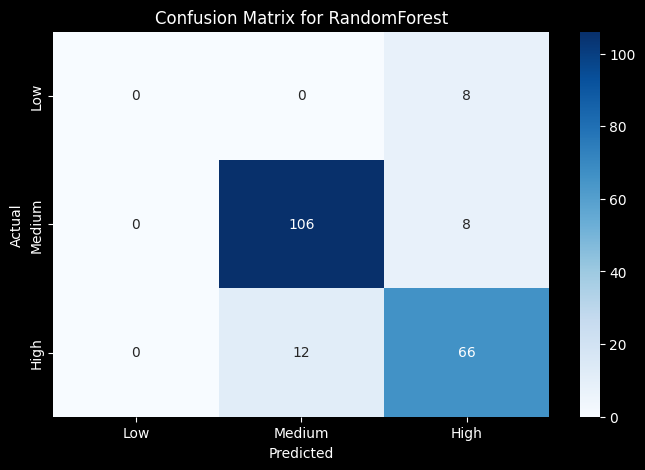


RandomForest - Classification Report:
               precision    recall  f1-score   support

         Low       0.00      0.00      0.00         8
      Medium       0.90      0.93      0.91       114
        High       0.80      0.85      0.82        78

    accuracy                           0.86       200
   macro avg       0.57      0.59      0.58       200
weighted avg       0.83      0.86      0.84       200



In [67]:
### RandomForest
random_forest_params = best_results_df.loc[best_results_df['Model'] == 'RandomForest', 'Best Params'].values[0]
models['RandomForest'].set_params(**random_forest_params)
models['RandomForest'] = train_and_evaluate_model(models['RandomForest'], 'RandomForest', X_train, y_train, X_test, y_test)


XGBoost - Training Accuracy: 1.000
XGBoost - Test Accuracy: 0.925
XGBoost - Training Precision: 1.000
XGBoost - Test Precision: 0.920
XGBoost - Training Recall: 1.000
XGBoost - Test Recall: 0.925
XGBoost - Training F1 Score: 1.000
XGBoost - Test F1 Score: 0.918

XGBoost - Confusion Matrix:
 [[  2   0   6]
 [  0 110   4]
 [  1   4  73]]


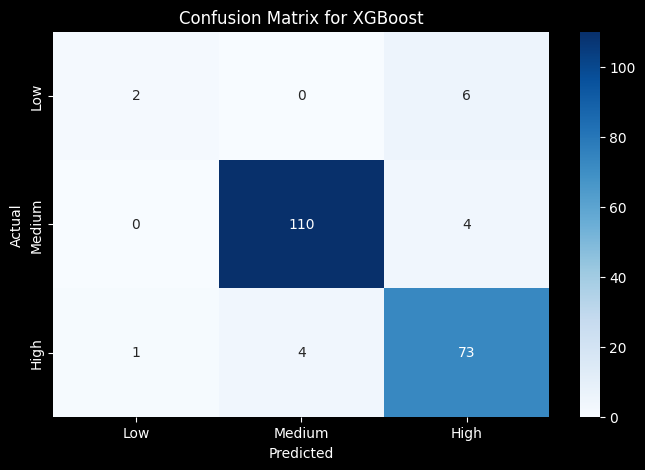


XGBoost - Classification Report:
               precision    recall  f1-score   support

         Low       0.67      0.25      0.36         8
      Medium       0.96      0.96      0.96       114
        High       0.88      0.94      0.91        78

    accuracy                           0.93       200
   macro avg       0.84      0.72      0.75       200
weighted avg       0.92      0.93      0.92       200



In [68]:
# XGBoost
xgboost_params = best_results_df.loc[best_results_df['Model'] == 'XGBoost', 'Best Params'].values[0]
models['XGBoost'].set_params(**xgboost_params)
models['XGBoost'] = train_and_evaluate_model(models['XGBoost'], 'XGBoost', X_train, y_train, X_test, y_test)


LGBM - Training Accuracy: 1.000
LGBM - Test Accuracy: 0.900
LGBM - Training Precision: 1.000
LGBM - Test Precision: 0.889
LGBM - Training Recall: 1.000
LGBM - Test Recall: 0.900
LGBM - Training F1 Score: 1.000
LGBM - Test F1 Score: 0.892

LGBM - Confusion Matrix:
 [[  1   0   7]
 [  0 107   7]
 [  2   4  72]]


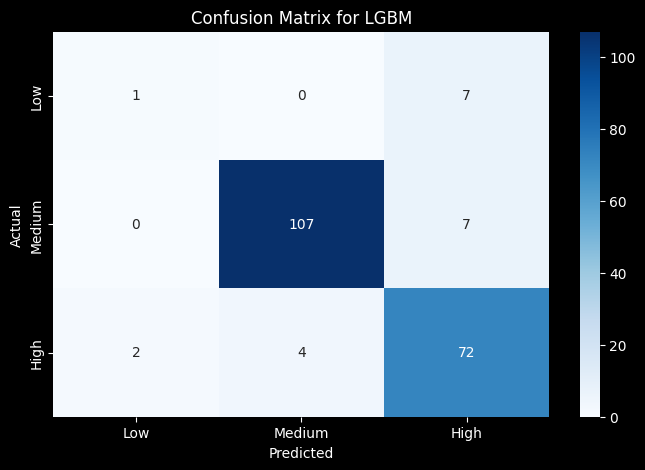


LGBM - Classification Report:
               precision    recall  f1-score   support

         Low       0.33      0.12      0.18         8
      Medium       0.96      0.94      0.95       114
        High       0.84      0.92      0.88        78

    accuracy                           0.90       200
   macro avg       0.71      0.66      0.67       200
weighted avg       0.89      0.90      0.89       200



In [69]:
# LGBM
lgbm_params = best_results_df.loc[best_results_df['Model'] == 'LGBM', 'Best Params'].values[0]
models['LGBM'].set_params(**lgbm_params)
models['LGBM'] = train_and_evaluate_model(models['LGBM'], 'LGBM', X_train, y_train, X_test, y_test)


DecisionTree - Training Accuracy: 1.000
DecisionTree - Test Accuracy: 0.730
DecisionTree - Training Precision: 1.000
DecisionTree - Test Precision: 0.753
DecisionTree - Training Recall: 1.000
DecisionTree - Test Recall: 0.730
DecisionTree - Training F1 Score: 1.000
DecisionTree - Test F1 Score: 0.739

DecisionTree - Confusion Matrix:
 [[ 2  0  6]
 [ 0 89 25]
 [10 13 55]]


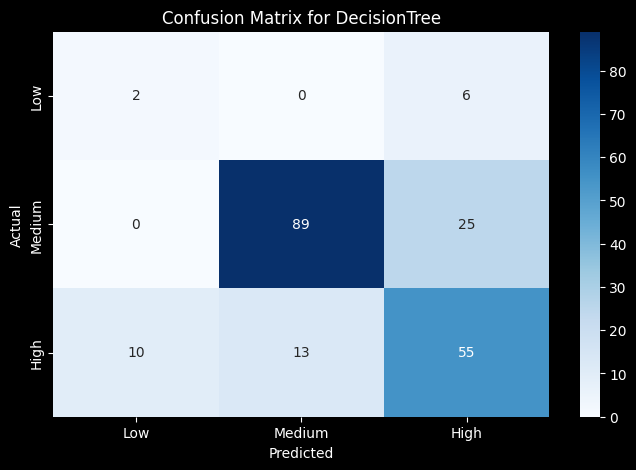


DecisionTree - Classification Report:
               precision    recall  f1-score   support

         Low       0.17      0.25      0.20         8
      Medium       0.87      0.78      0.82       114
        High       0.64      0.71      0.67        78

    accuracy                           0.73       200
   macro avg       0.56      0.58      0.56       200
weighted avg       0.75      0.73      0.74       200



In [70]:
# DecisionTree
decision_tree_params = best_results_df.loc[best_results_df['Model'] == 'DecisionTree', 'Best Params'].values[0]
models['DecisionTree'].set_params(**decision_tree_params)
models['DecisionTree'] = train_and_evaluate_model(models['DecisionTree'], 'DecisionTree', X_train, y_train, X_test, y_test)


KNN - Training Accuracy: 1.000
KNN - Test Accuracy: 0.780
KNN - Training Precision: 1.000
KNN - Test Precision: 0.785
KNN - Training Recall: 1.000
KNN - Test Recall: 0.780
KNN - Training F1 Score: 1.000
KNN - Test F1 Score: 0.766

KNN - Confusion Matrix:
 [[  1   0   7]
 [  0 103  11]
 [  0  26  52]]


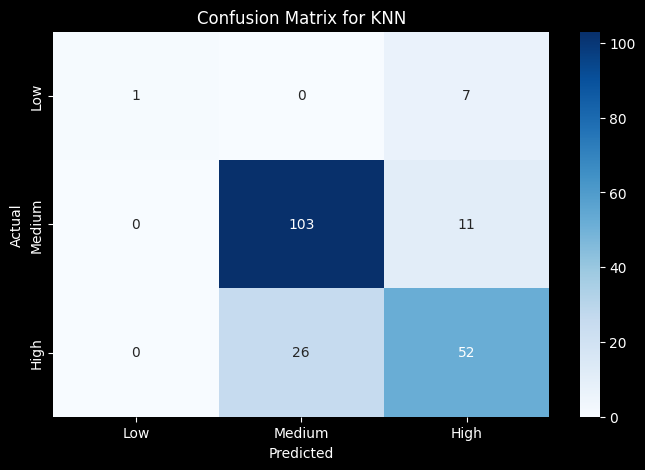


KNN - Classification Report:
               precision    recall  f1-score   support

         Low       1.00      0.12      0.22         8
      Medium       0.80      0.90      0.85       114
        High       0.74      0.67      0.70        78

    accuracy                           0.78       200
   macro avg       0.85      0.57      0.59       200
weighted avg       0.78      0.78      0.77       200



In [71]:
# KNN
knn_params = best_results_df.loc[best_results_df['Model'] == 'KNN', 'Best Params'].values[0]
models['KNN'].set_params(**knn_params)
models['KNN'] = train_and_evaluate_model(models['KNN'], 'KNN', X_train, y_train, X_test, y_test)


SVC - Training Accuracy: 0.981
SVC - Test Accuracy: 0.885
SVC - Training Precision: 0.981
SVC - Test Precision: 0.883
SVC - Training Recall: 0.981
SVC - Test Recall: 0.885
SVC - Training F1 Score: 0.981
SVC - Test F1 Score: 0.882

SVC - Confusion Matrix:
 [[  4   0   4]
 [  0 109   5]
 [  1  13  64]]


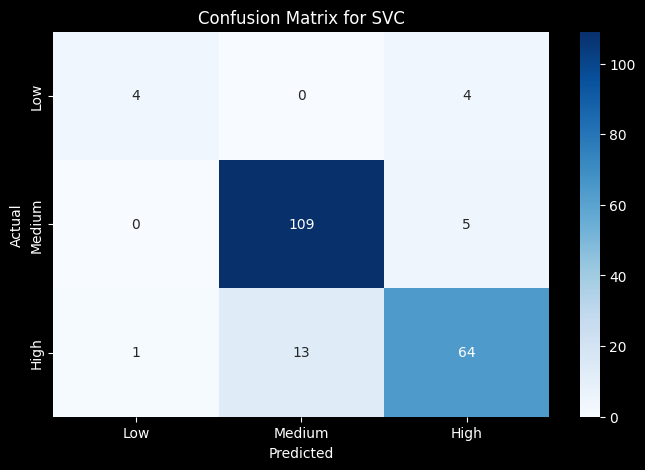


SVC - Classification Report:
               precision    recall  f1-score   support

         Low       0.80      0.50      0.62         8
      Medium       0.89      0.96      0.92       114
        High       0.88      0.82      0.85        78

    accuracy                           0.89       200
   macro avg       0.86      0.76      0.80       200
weighted avg       0.88      0.89      0.88       200



In [72]:
# SVC
svc_params = best_results_df.loc[best_results_df['Model'] == 'SVC', 'Best Params'].values[0]
models['SVC'].set_params(**svc_params)
models['SVC'] = train_and_evaluate_model(models['SVC'], 'SVC', X_train, y_train, X_test, y_test)


LogisticRegression - Training Accuracy: 0.791
LogisticRegression - Test Accuracy: 0.785
LogisticRegression - Training Precision: 0.793
LogisticRegression - Test Precision: 0.783
LogisticRegression - Training Recall: 0.791
LogisticRegression - Test Recall: 0.785
LogisticRegression - Training F1 Score: 0.788
LogisticRegression - Test F1 Score: 0.782

LogisticRegression - Confusion Matrix:
 [[ 4  0  4]
 [ 0 99 15]
 [ 1 23 54]]


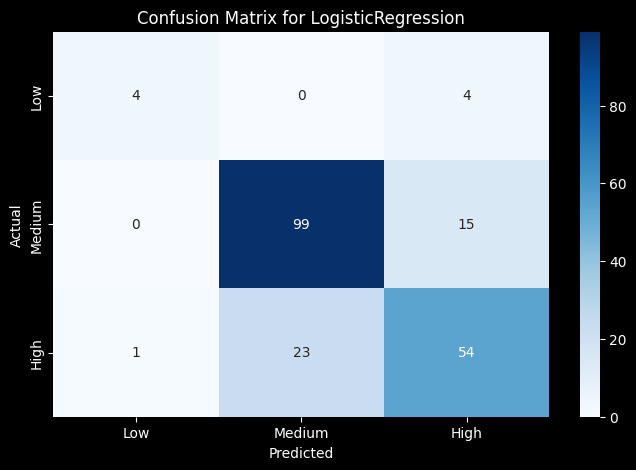


LogisticRegression - Classification Report:
               precision    recall  f1-score   support

         Low       0.80      0.50      0.62         8
      Medium       0.81      0.87      0.84       114
        High       0.74      0.69      0.72        78

    accuracy                           0.79       200
   macro avg       0.78      0.69      0.72       200
weighted avg       0.78      0.79      0.78       200



In [73]:
# Logistic Regression
logistic_params = best_results_df.loc[best_results_df['Model'] == 'LogisticRegression', 'Best Params'].values[0]
models['LogisticRegression'].set_params(**logistic_params)
models['LogisticRegression'] = train_and_evaluate_model(models['LogisticRegression'], 'LogisticRegression', X_train, y_train, X_test, y_test)


CatBoost - Training Accuracy: 0.999
CatBoost - Test Accuracy: 0.940
CatBoost - Training Precision: 0.999
CatBoost - Test Precision: 0.903
CatBoost - Training Recall: 0.999
CatBoost - Test Recall: 0.940
CatBoost - Training F1 Score: 0.999
CatBoost - Test F1 Score: 0.921

CatBoost - Confusion Matrix:
 [[  0   0   8]
 [  0 113   1]
 [  0   3  75]]


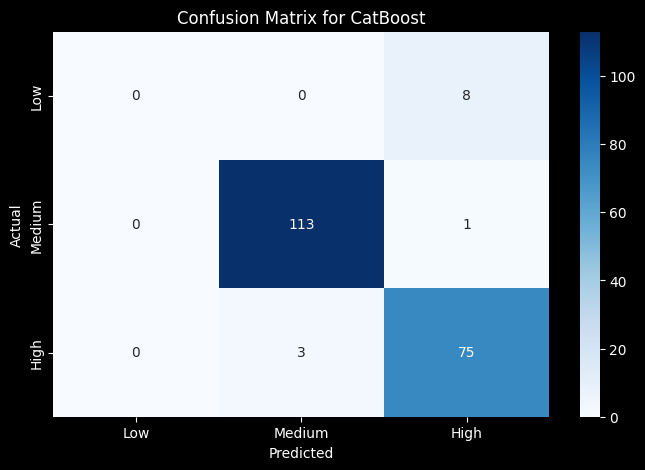


CatBoost - Classification Report:
               precision    recall  f1-score   support

         Low       0.00      0.00      0.00         8
      Medium       0.97      0.99      0.98       114
        High       0.89      0.96      0.93        78

    accuracy                           0.94       200
   macro avg       0.62      0.65      0.64       200
weighted avg       0.90      0.94      0.92       200



In [74]:
# CatBoost
catboost_params = best_results_df.loc[best_results_df['Model'] == 'CatBoost', 'Best Params'].values[0]
models['CatBoost'].set_params(**catboost_params)
models['CatBoost'] = train_and_evaluate_model(models['CatBoost'], 'CatBoost', X_train, y_train, X_test, y_test)


GradientBoosting - Training Accuracy: 1.000
GradientBoosting - Test Accuracy: 0.810
GradientBoosting - Training Precision: 1.000
GradientBoosting - Test Precision: 0.797
GradientBoosting - Training Recall: 1.000
GradientBoosting - Test Recall: 0.810
GradientBoosting - Training F1 Score: 1.000
GradientBoosting - Test F1 Score: 0.801

GradientBoosting - Confusion Matrix:
 [[  1   0   7]
 [  0 102  12]
 [  2  17  59]]


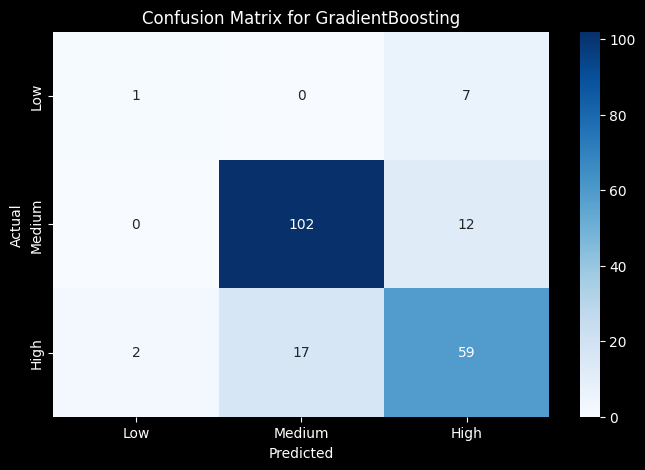


GradientBoosting - Classification Report:
               precision    recall  f1-score   support

         Low       0.33      0.12      0.18         8
      Medium       0.86      0.89      0.88       114
        High       0.76      0.76      0.76        78

    accuracy                           0.81       200
   macro avg       0.65      0.59      0.60       200
weighted avg       0.80      0.81      0.80       200



In [75]:
# Gradient Boosting
gradient_boosting_params = best_results_df.loc[best_results_df['Model'] == 'GradientBoosting', 'Best Params'].values[0]
models['GradientBoosting'].set_params(**gradient_boosting_params)
models['GradientBoosting'] = train_and_evaluate_model(models['GradientBoosting'], 'GradientBoosting', X_train, y_train, X_test, y_test)


AdaBoost - Training Accuracy: 0.927
AdaBoost - Test Accuracy: 0.920
AdaBoost - Training Precision: 0.894
AdaBoost - Test Precision: 0.891
AdaBoost - Training Recall: 0.927
AdaBoost - Test Recall: 0.920
AdaBoost - Training F1 Score: 0.909
AdaBoost - Test F1 Score: 0.903

AdaBoost - Confusion Matrix:
 [[  0   0   8]
 [  0 107   7]
 [  0   1  77]]


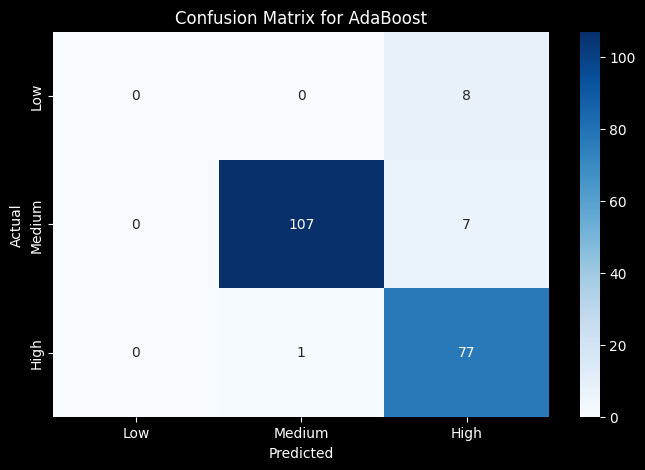


AdaBoost - Classification Report:
               precision    recall  f1-score   support

         Low       0.00      0.00      0.00         8
      Medium       0.99      0.94      0.96       114
        High       0.84      0.99      0.91        78

    accuracy                           0.92       200
   macro avg       0.61      0.64      0.62       200
weighted avg       0.89      0.92      0.90       200



In [76]:
# AdaBoost
adaboost_params = best_results_df.loc[best_results_df['Model'] == 'AdaBoost', 'Best Params'].values[0]
models['AdaBoost'].set_params(**adaboost_params)
models['AdaBoost'] = train_and_evaluate_model(models['AdaBoost'], 'AdaBoost', X_train, y_train, X_test, y_test)


NaiveBayes - Training Accuracy: 0.789
NaiveBayes - Test Accuracy: 0.780
NaiveBayes - Training Precision: 0.788
NaiveBayes - Test Precision: 0.746
NaiveBayes - Training Recall: 0.789
NaiveBayes - Test Recall: 0.780
NaiveBayes - Training F1 Score: 0.781
NaiveBayes - Test F1 Score: 0.758

NaiveBayes - Confusion Matrix:
 [[  0   0   8]
 [  0 106   8]
 [  0  28  50]]


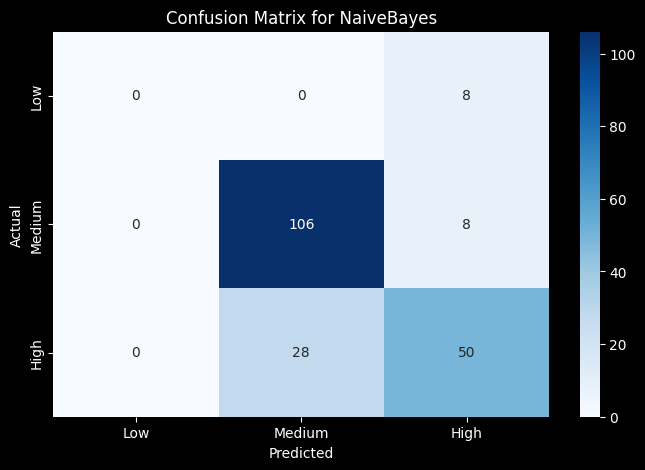


NaiveBayes - Classification Report:
               precision    recall  f1-score   support

         Low       0.00      0.00      0.00         8
      Medium       0.79      0.93      0.85       114
        High       0.76      0.64      0.69        78

    accuracy                           0.78       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.75      0.78      0.76       200



In [77]:
# Naive Bayes
naive_bayes_params = best_results_df.loc[best_results_df['Model'] == 'NaiveBayes', 'Best Params'].values[0]
models['NaiveBayes'].set_params(**naive_bayes_params)
models['NaiveBayes'] = train_and_evaluate_model(models['NaiveBayes'], 'NaiveBayes', X_train, y_train, X_test, y_test)

In [78]:
metrics_df = pd.DataFrame(metrics_dict).T  
metrics_df = metrics_df.sort_values(by=['Test F1', 'Test Accuracy'], ascending=False)
metrics_df

,Train Accuracy,Train Precision,Train Recall,Train F1,Test Accuracy,Test Precision,Test Recall,Test F1
CatBoost,0.99875,0.998754,0.99875,0.998742,0.940,0.903473,0.940,0.921198
XGBoost,1.00000,1.000000,1.00000,1.000000,0.925,0.919679,0.925,0.918210
AdaBoost,0.92750,0.893610,0.92750,0.908596,0.920,0.891135,0.920,0.902754
LGBM,1.00000,1.000000,1.00000,1.000000,0.900,0.889304,0.900,0.891845
SVC,0.98125,0.981331,0.98125,0.981116,0.885,0.883180,0.885,0.881737
RandomForest,0.99875,0.998754,0.99875,0.998742,0.860,0.825936,0.860,0.842612
GradientBoosting,1.00000,1.000000,1.00000,1.000000,0.810,0.796905,0.810,0.801329
LogisticRegression,0.79125,0.793035,0.79125,0.787551,0.785,0.783034,0.785,0.781776
KNN,1.00000,1.000000,1.00000,1.000000,0.780,0.784831,0.780,0.766153
NaiveBayes,0.78875,0.787592,0.78875,0.781362,0.780,0.746350,0.780,0.758091


In [79]:
# Assuming metrics_df contains the evaluation metrics and is sorted by performance
# Get the name of the best model
# Get the metrics for the best model
best_model_name = metrics_df.index[0]  
best_model_metrics = metrics_df.loc[best_model_name]  
print(f"The best model is: {best_model_name}")
print(f"Metrics for {best_model_name}:")
print(f"  Training Accuracy: {best_model_metrics['Train Accuracy']:.2f}")
print(f"  Training Precision: {best_model_metrics['Train Precision']:.2f}")
print(f"  Training Recall: {best_model_metrics['Train Recall']:.2f}")
print(f"  Training F1 Score: {best_model_metrics['Train F1']:.2f}")
print(f"  Test Accuracy: {best_model_metrics['Test Accuracy']:.2f}")
print(f"  Test Precision: {best_model_metrics['Test Precision']:.2f}")
print(f"  Test Recall: {best_model_metrics['Test Recall']:.2f}")
print(f"  Test F1 Score: {best_model_metrics['Test F1']:.2f}")

The best model is: CatBoost
Metrics for CatBoost:
  Training Accuracy: 1.00
  Training Precision: 1.00
  Training Recall: 1.00
  Training F1 Score: 1.00
  Test Accuracy: 0.94
  Test Precision: 0.90
  Test Recall: 0.94
  Test F1 Score: 0.92


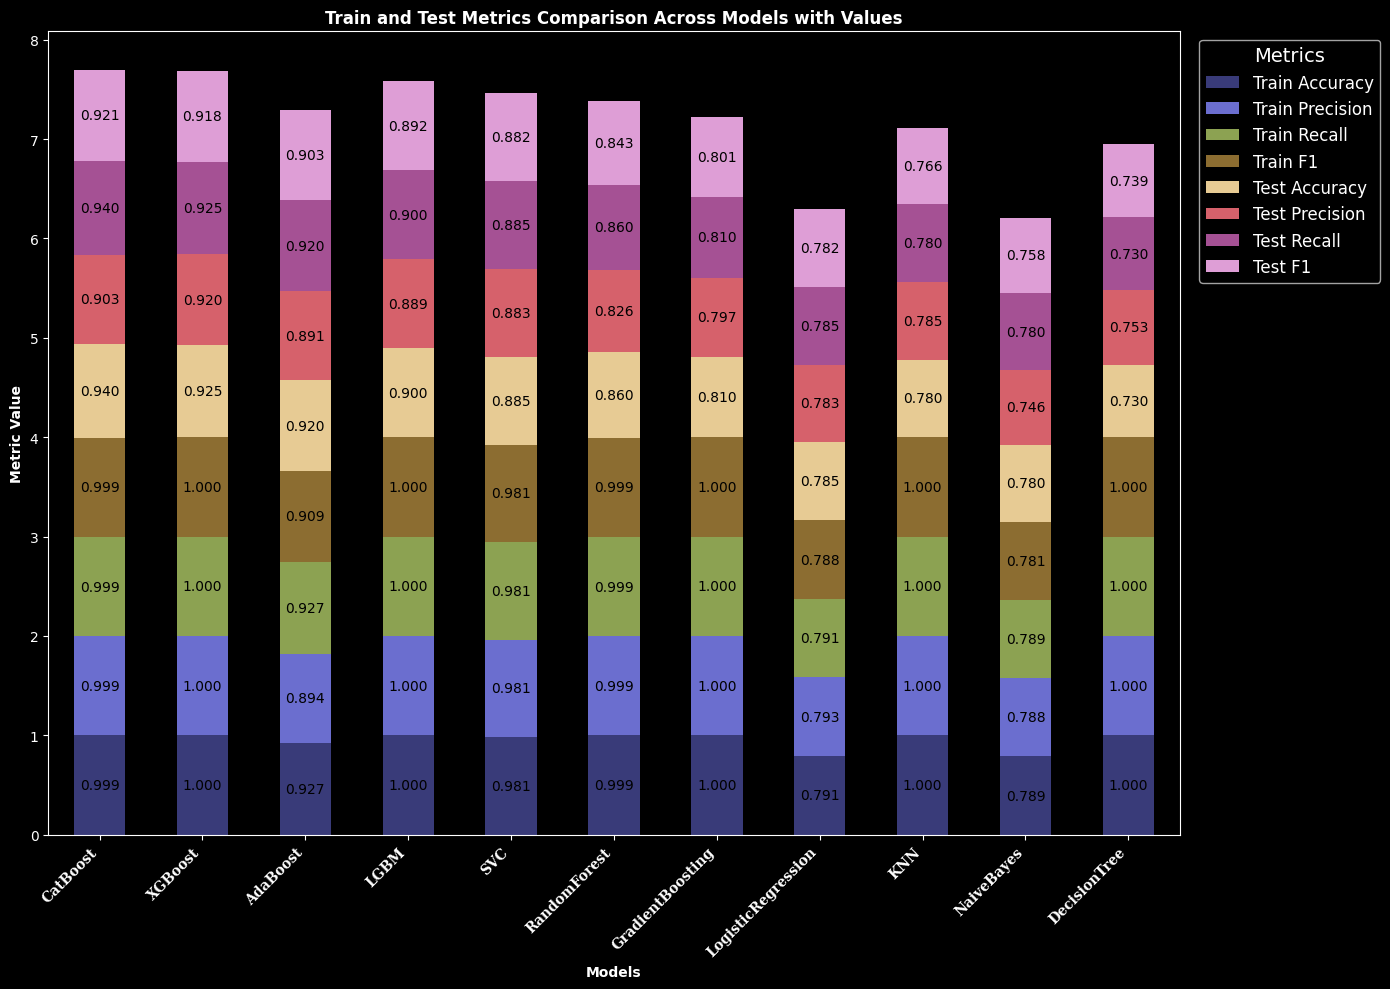

In [80]:
ax = metrics_df.plot(kind="bar", stacked=True, figsize=(14, 10), colormap="tab20b")
# Annotate bar values at the center
for container in ax.containers:
    for bar in container:
        if bar.get_height() > 0: 
            ax.text(bar.get_x() + bar.get_width() / 2,bar.get_y() + bar.get_height() / 2,f"{bar.get_height():.3f}",
                ha="center",va="center",fontsize=10,color="black")
# Add titles and labels
plt.title("Train and Test Metrics Comparison Across Models with Values", fontsize=12, weight='bold')
plt.xlabel("Models", fontsize=10, weight='bold')
plt.ylabel("Metric Value", fontsize=10, weight='bold')
plt.xticks(rotation=45, ha="right")
ax.set_xticklabels(metrics_df.index, fontdict=font_properties, rotation=45, ha='right')
plt.legend(title="Metrics", bbox_to_anchor=(1.01, 1), loc="upper left", fontsize=12,title_fontsize=14)
plt.tight_layout()
plt.show()

In [81]:
### Save Best Model
with open(f'{best_model_name}_model.pkl', 'wb') as file:
    pickle.dump(models[best_model_name], file)
with open(f'{best_model_name}_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
print(f"The model '{best_model_name}' has been loaded successfully.")
print(type(loaded_model))

The model 'CatBoost' has been loaded successfully.
<class 'catboost.core.CatBoostClassifier'>


In [82]:
### Apply Balancing
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
print(y_train_resampled.value_counts())

risk_level
1    453
2    453
0    453
Name: count, dtype: int64


In [83]:
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(),
    'LGBM': LGBMClassifier(verbose=-1),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(probability=True,random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42),
    'CatBoost': CatBoostClassifier(logging_level='Silent'),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'NaiveBayes': GaussianNB()
}
### Validation Score
cv_results = {}
for model_name, model in models.items():
    print(f"Cross-validating {model_name}...")
    cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy', n_jobs=-1,verbose=0)
    cv_results[model_name] = cv_scores.mean()
    print(f"Mean accuracy for {model_name}: {cv_scores.mean():.4f}")

Cross-validating RandomForest...
Mean accuracy for RandomForest: 0.9308
Cross-validating XGBoost...
Mean accuracy for XGBoost: 0.9404
Cross-validating LGBM...
Mean accuracy for LGBM: 0.9331
Cross-validating DecisionTree...
Mean accuracy for DecisionTree: 0.8676
Cross-validating KNN...
Mean accuracy for KNN: 0.8264
Cross-validating SVC...
Mean accuracy for SVC: 0.8786
Cross-validating LogisticRegression...
Mean accuracy for LogisticRegression: 0.7160
Cross-validating CatBoost...
Mean accuracy for CatBoost: 0.9706
Cross-validating GradientBoosting...
Mean accuracy for GradientBoosting: 0.9338
Cross-validating AdaBoost...
Mean accuracy for AdaBoost: 0.7440
Cross-validating NaiveBayes...
Mean accuracy for NaiveBayes: 0.7226


In [84]:
cv_results_df = pd.DataFrame(list(cv_results.items()), columns=['Model', 'Mean Accuracy'])
cv_results_df = cv_results_df.sort_values(by='Mean Accuracy', ascending=False)
cv_results_df

,Model,Mean Accuracy
7,CatBoost,0.970567
1,XGBoost,0.940411
8,GradientBoosting,0.933802
2,LGBM,0.933058
0,RandomForest,0.930850
5,SVC,0.878609
3,DecisionTree,0.867604
4,KNN,0.826384
9,AdaBoost,0.743979
10,NaiveBayes,0.722623


In [85]:
best_model_name = cv_results_df.iloc[0]['Model']
print(f"\nBest model from CV: {best_model_name}")


Best model from CV: CatBoost


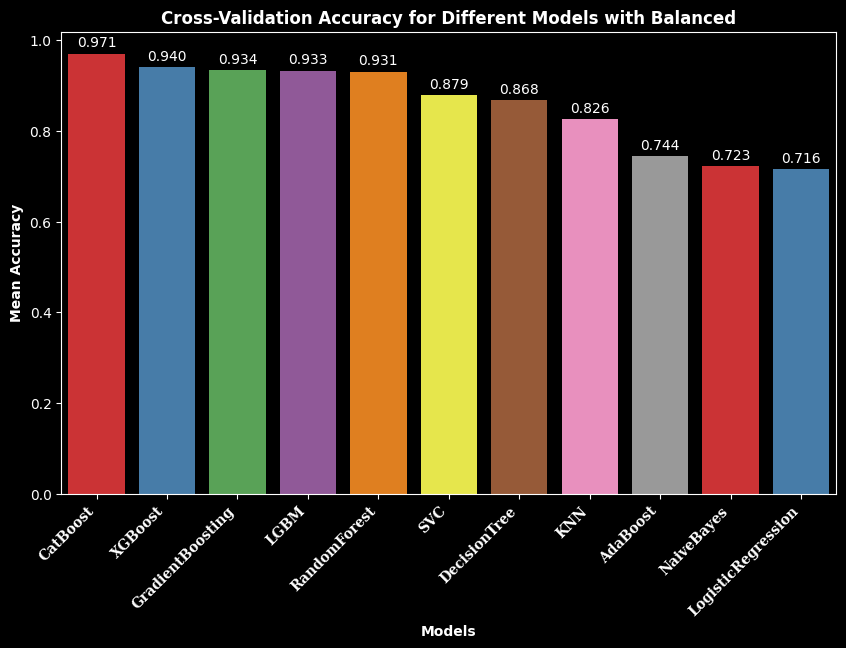

In [86]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=cv_results_df, x='Model', y='Mean Accuracy', palette='Set1')
ax.set_title('Cross-Validation Accuracy for Different Models with Balanced', fontsize=12, weight='bold', loc='center')
ax.set_xlabel('Models', fontsize=10, weight='bold')
ax.set_ylabel('Mean Accuracy', fontsize=10, weight='bold')
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height():.3f}' for v in container], padding=3)
plt.xticks(rotation=45,ha='right') 
ax.set_xticklabels(cv_results_df.Model, fontdict=font_properties)
plt.show()

In [87]:
best_results = []
for model_name, model in models.items():
    print(f"\nPerforming GridSearchCV for {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_results.append({'Model': model_name, 'Best Score': best_score, 'Best Params': best_params})
    print(f"\nBest parameters for {model_name}: {best_params}")
    print(f"Best cross-validation score for {model_name}: {best_score:.4f}")


Performing GridSearchCV for RandomForest...

Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score for RandomForest: 0.9308

Performing GridSearchCV for XGBoost...

Best parameters for XGBoost: {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.6}
Best cross-validation score for XGBoost: 0.9765

Performing GridSearchCV for LGBM...

Best parameters for LGBM: {'learning_rate': 1, 'max_depth': 5, 'n_estimators': 100}
Best cross-validation score for LGBM: 0.9610

Performing GridSearchCV for DecisionTree...

Best parameters for DecisionTree: {'max_depth': None, 'min_samples_split': 2}
Best cross-validation score for DecisionTree: 0.8676

Performing GridSearchCV for KNN...

Best parameters for KNN: {'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score for KNN: 0.8794

Performing GridSearchCV for SVC...

Best parameters for SVC: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best cros

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



Best parameters for LogisticRegression: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation score for LogisticRegression: 0.7263

Performing GridSearchCV for CatBoost...

Best parameters for CatBoost: {'depth': 6, 'iterations': 200, 'learning_rate': 0.5}
Best cross-validation score for CatBoost: 0.9684

Performing GridSearchCV for GradientBoosting...

Best parameters for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
Best cross-validation score for GradientBoosting: 0.9080

Performing GridSearchCV for AdaBoost...

Best parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 100}
Best cross-validation score for AdaBoost: 0.7726

Performing GridSearchCV for NaiveBayes...

Best parameters for NaiveBayes: {}
Best cross-validation score for NaiveBayes: 0.7226


In [88]:
best_results_df = pd.DataFrame(best_results)
best_results_df = best_results_df.sort_values(by='Best Score', ascending=False)
best_results_df

,Model,Best Score,Best Params
1,XGBoost,0.976468,"{'learning_rate': 1, 'max_depth': 3, 'n_estima..."
7,CatBoost,0.968366,"{'depth': 6, 'iterations': 200, 'learning_rate..."
2,LGBM,0.961010,"{'learning_rate': 1, 'max_depth': 5, 'n_estima..."
0,RandomForest,0.930850,"{'max_depth': None, 'min_samples_split': 2, 'n..."
5,SVC,0.920553,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}"
8,GradientBoosting,0.908045,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est..."
4,KNN,0.879352,"{'n_neighbors': 3, 'weights': 'distance'}"
3,DecisionTree,0.867604,"{'max_depth': None, 'min_samples_split': 2}"
9,AdaBoost,0.772629,"{'learning_rate': 1, 'n_estimators': 100}"
6,LogisticRegression,0.726275,"{'C': 10, 'penalty': 'l2', 'solver': 'saga'}"


In [89]:
best_model_name, best_model_param = best_results_df.iloc[0]['Model'],best_results_df.iloc[0]['Best Params']
print(f"\nBest model : {best_model_name}")
print(f"\nBest Parameters : {best_model_param}")


Best model : XGBoost

Best Parameters : {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.6}


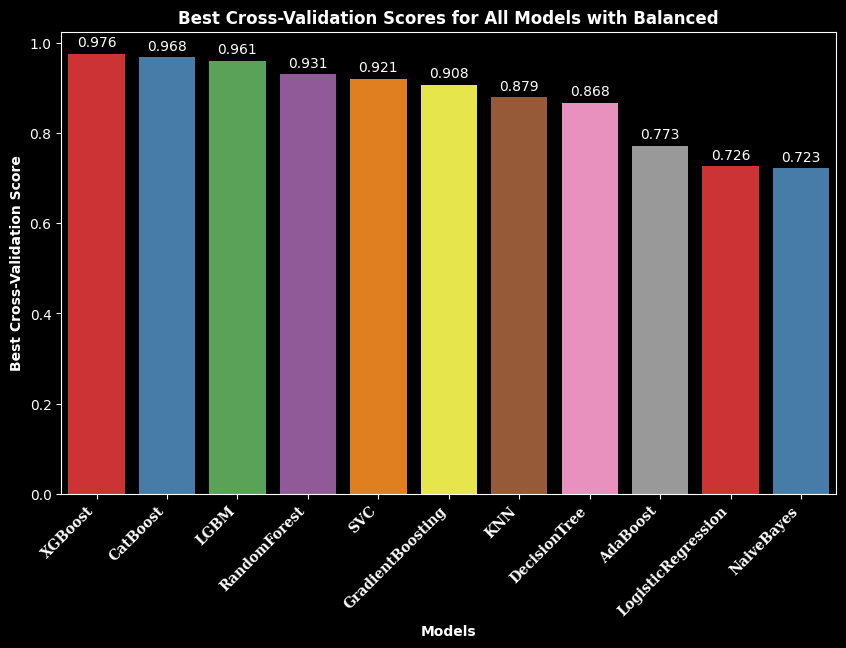

In [90]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=best_results_df, x='Model', y='Best Score', palette='Set1')
ax.set_title('Best Cross-Validation Scores for All Models with Balanced', fontsize=12, weight='bold', loc='center')
ax.set_xlabel('Models', fontsize=10, weight='bold')
ax.set_ylabel('Best Cross-Validation Score', fontsize=10, weight='bold')
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height():.3f}' for v in container], padding=3)
plt.xticks(rotation=45,ha='right') 
ax.set_xticklabels(best_results_df.Model, fontdict=font_properties)
plt.show()


RandomForest - Training Accuracy: 1.000
RandomForest - Test Accuracy: 0.865
RandomForest - Training Precision: 1.000
RandomForest - Test Precision: 0.836
RandomForest - Training Recall: 1.000
RandomForest - Test Recall: 0.865
RandomForest - Training F1 Score: 1.000
RandomForest - Test F1 Score: 0.849

RandomForest - Confusion Matrix:
 [[  0   0   8]
 [  0 103  11]
 [  0   8  70]]


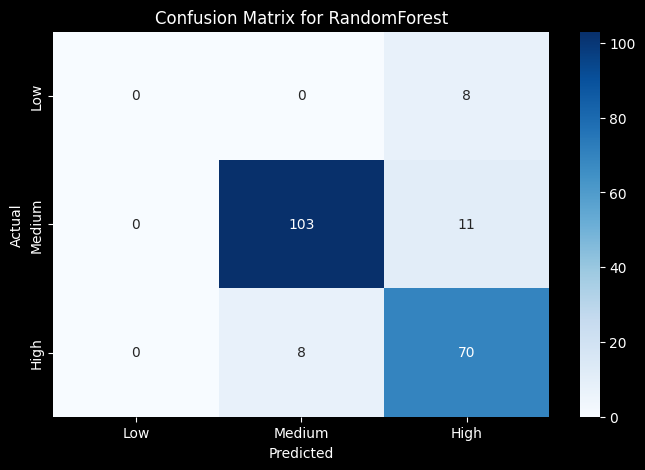


RandomForest - Classification Report:
               precision    recall  f1-score   support

         Low       0.00      0.00      0.00         8
      Medium       0.93      0.90      0.92       114
        High       0.79      0.90      0.84        78

    accuracy                           0.86       200
   macro avg       0.57      0.60      0.58       200
weighted avg       0.84      0.86      0.85       200



In [91]:
### RandomForest
random_forest_params = best_results_df.loc[best_results_df['Model'] == 'RandomForest', 'Best Params'].values[0]
models['RandomForest'].set_params(**random_forest_params)
models['RandomForest'] = train_and_evaluate_model(models['RandomForest'], 'RandomForest', X_train_resampled, y_train_resampled, X_test, y_test)


XGBoost - Training Accuracy: 1.000
XGBoost - Test Accuracy: 0.895
XGBoost - Training Precision: 1.000
XGBoost - Test Precision: 0.888
XGBoost - Training Recall: 1.000
XGBoost - Test Recall: 0.895
XGBoost - Training F1 Score: 1.000
XGBoost - Test F1 Score: 0.891

XGBoost - Confusion Matrix:
 [[  2   0   6]
 [  0 108   6]
 [  3   6  69]]


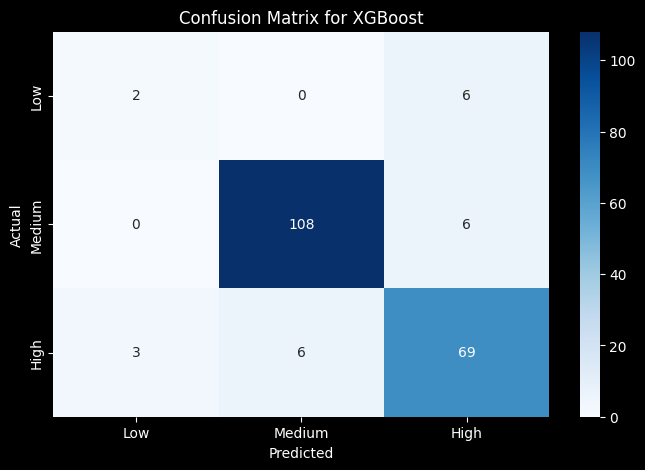


XGBoost - Classification Report:
               precision    recall  f1-score   support

         Low       0.40      0.25      0.31         8
      Medium       0.95      0.95      0.95       114
        High       0.85      0.88      0.87        78

    accuracy                           0.90       200
   macro avg       0.73      0.69      0.71       200
weighted avg       0.89      0.90      0.89       200



In [92]:
# XGBoost
xgboost_params = best_results_df.loc[best_results_df['Model'] == 'XGBoost', 'Best Params'].values[0]
models['XGBoost'].set_params(**xgboost_params)
models['XGBoost'] = train_and_evaluate_model(models['XGBoost'], 'XGBoost', X_train_resampled, y_train_resampled, X_test, y_test)


LGBM - Training Accuracy: 1.000
LGBM - Test Accuracy: 0.900
LGBM - Training Precision: 1.000
LGBM - Test Precision: 0.867
LGBM - Training Recall: 1.000
LGBM - Test Recall: 0.900
LGBM - Training F1 Score: 1.000
LGBM - Test F1 Score: 0.882

LGBM - Confusion Matrix:
 [[  0   0   8]
 [  0 108   6]
 [  0   6  72]]


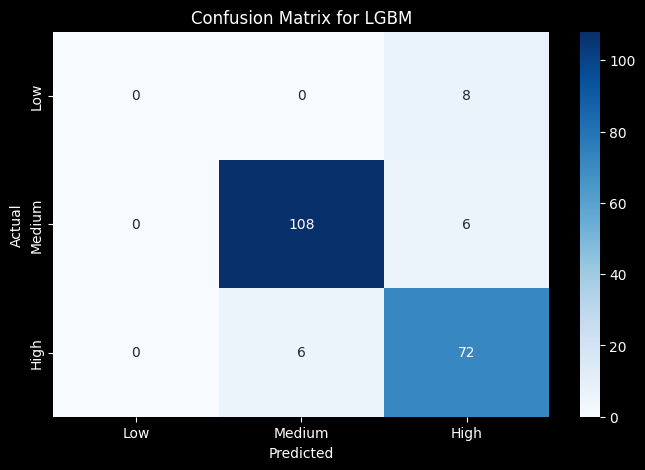


LGBM - Classification Report:
               precision    recall  f1-score   support

         Low       0.00      0.00      0.00         8
      Medium       0.95      0.95      0.95       114
        High       0.84      0.92      0.88        78

    accuracy                           0.90       200
   macro avg       0.59      0.62      0.61       200
weighted avg       0.87      0.90      0.88       200



In [93]:
# LGBM
lgbm_params = best_results_df.loc[best_results_df['Model'] == 'LGBM', 'Best Params'].values[0]
models['LGBM'].set_params(**lgbm_params)
models['LGBM'] = train_and_evaluate_model(models['LGBM'], 'LGBM', X_train_resampled, y_train_resampled, X_test, y_test)


DecisionTree - Training Accuracy: 1.000
DecisionTree - Test Accuracy: 0.755
DecisionTree - Training Precision: 1.000
DecisionTree - Test Precision: 0.757
DecisionTree - Training Recall: 1.000
DecisionTree - Test Recall: 0.755
DecisionTree - Training F1 Score: 1.000
DecisionTree - Test F1 Score: 0.756

DecisionTree - Confusion Matrix:
 [[ 3  0  5]
 [ 0 95 19]
 [ 6 19 53]]


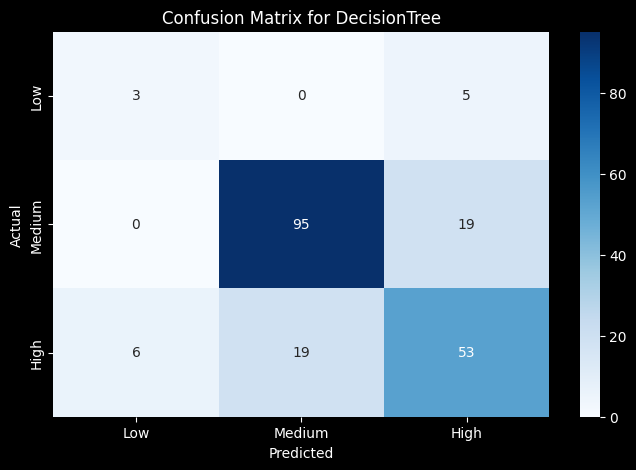


DecisionTree - Classification Report:
               precision    recall  f1-score   support

         Low       0.33      0.38      0.35         8
      Medium       0.83      0.83      0.83       114
        High       0.69      0.68      0.68        78

    accuracy                           0.76       200
   macro avg       0.62      0.63      0.62       200
weighted avg       0.76      0.76      0.76       200



In [94]:
# DecisionTree
decision_tree_params = best_results_df.loc[best_results_df['Model'] == 'DecisionTree', 'Best Params'].values[0]
models['DecisionTree'].set_params(**decision_tree_params)
models['DecisionTree'] = train_and_evaluate_model(models['DecisionTree'], 'DecisionTree', X_train_resampled, y_train_resampled, X_test, y_test)


KNN - Training Accuracy: 1.000
KNN - Test Accuracy: 0.745
KNN - Training Precision: 1.000
KNN - Test Precision: 0.746
KNN - Training Recall: 1.000
KNN - Test Recall: 0.745
KNN - Training F1 Score: 1.000
KNN - Test F1 Score: 0.744

KNN - Confusion Matrix:
 [[ 3  0  5]
 [ 0 97 17]
 [ 7 22 49]]


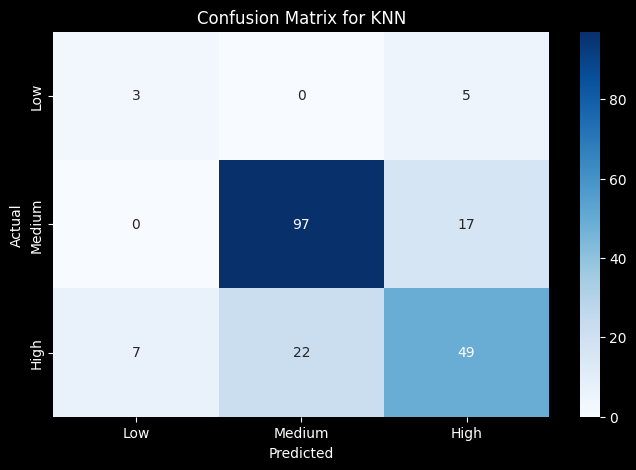


KNN - Classification Report:
               precision    recall  f1-score   support

         Low       0.30      0.38      0.33         8
      Medium       0.82      0.85      0.83       114
        High       0.69      0.63      0.66        78

    accuracy                           0.74       200
   macro avg       0.60      0.62      0.61       200
weighted avg       0.75      0.74      0.74       200



In [95]:
# KNN
knn_params = best_results_df.loc[best_results_df['Model'] == 'KNN', 'Best Params'].values[0]
models['KNN'].set_params(**knn_params)
models['KNN'] = train_and_evaluate_model(models['KNN'], 'KNN', X_train_resampled, y_train_resampled, X_test, y_test)


SVC - Training Accuracy: 1.000
SVC - Test Accuracy: 0.875
SVC - Training Precision: 1.000
SVC - Test Precision: 0.873
SVC - Training Recall: 1.000
SVC - Test Recall: 0.875
SVC - Training F1 Score: 1.000
SVC - Test F1 Score: 0.872

SVC - Confusion Matrix:
 [[  4   0   4]
 [  0 107   7]
 [  1  13  64]]


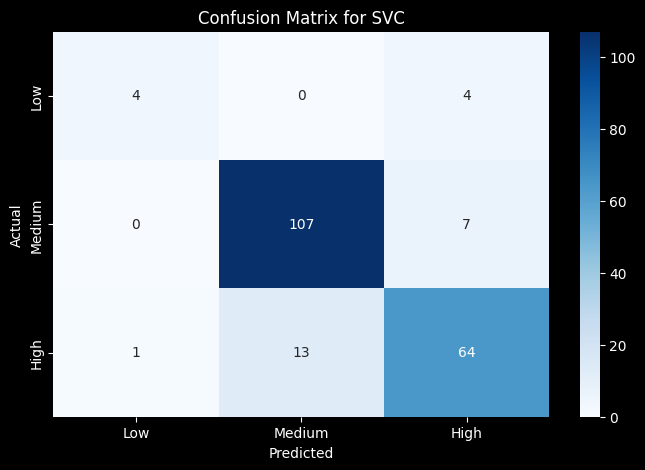


SVC - Classification Report:
               precision    recall  f1-score   support

         Low       0.80      0.50      0.62         8
      Medium       0.89      0.94      0.91       114
        High       0.85      0.82      0.84        78

    accuracy                           0.88       200
   macro avg       0.85      0.75      0.79       200
weighted avg       0.87      0.88      0.87       200



In [96]:
# SVC
svc_params = {'C': 200000, 'gamma': 'scale', 'kernel': 'rbf'}
#svc_params['class_weight'] = class_weight_dict
models['SVC'] = SVC()
models['SVC'].set_params(**svc_params)
models['SVC'] = train_and_evaluate_model(models['SVC'], 'SVC', X_train, y_train, X_test, y_test)


LogisticRegression - Training Accuracy: 0.716
LogisticRegression - Test Accuracy: 0.725
LogisticRegression - Training Precision: 0.691
LogisticRegression - Test Precision: 0.700
LogisticRegression - Training Recall: 0.716
LogisticRegression - Test Recall: 0.725
LogisticRegression - Training F1 Score: 0.679
LogisticRegression - Test F1 Score: 0.688

LogisticRegression - Confusion Matrix:
 [[  0   0   8]
 [  0 110   4]
 [  0  43  35]]


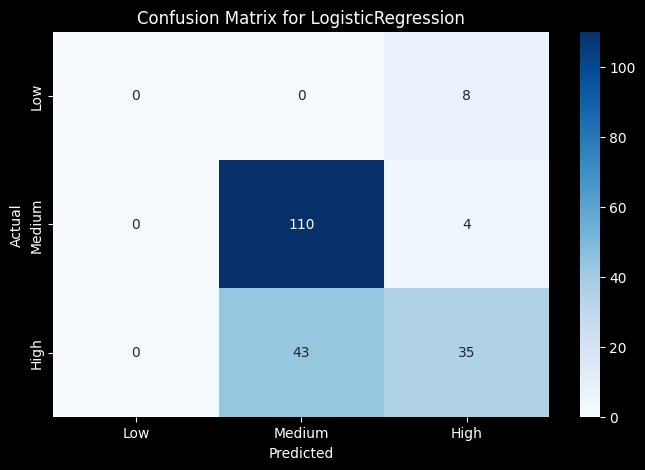


LogisticRegression - Classification Report:
               precision    recall  f1-score   support

         Low       0.00      0.00      0.00         8
      Medium       0.72      0.96      0.82       114
        High       0.74      0.45      0.56        78

    accuracy                           0.72       200
   macro avg       0.49      0.47      0.46       200
weighted avg       0.70      0.72      0.69       200



In [97]:
# Logistic Regression
logistic_params = {'C': .01, 'penalty': 'l2', 'solver': 'saga'}
models['LogisticRegression'].set_params(**logistic_params)
models['LogisticRegression'] = train_and_evaluate_model(models['LogisticRegression'], 'LogisticRegression', X_train, y_train, X_test, y_test)


CatBoost - Training Accuracy: 1.000
CatBoost - Test Accuracy: 0.925
CatBoost - Training Precision: 1.000
CatBoost - Test Precision: 0.928
CatBoost - Training Recall: 1.000
CatBoost - Test Recall: 0.925
CatBoost - Training F1 Score: 1.000
CatBoost - Test F1 Score: 0.920

CatBoost - Confusion Matrix:
 [[  3   0   5]
 [  0 109   5]
 [  0   5  73]]


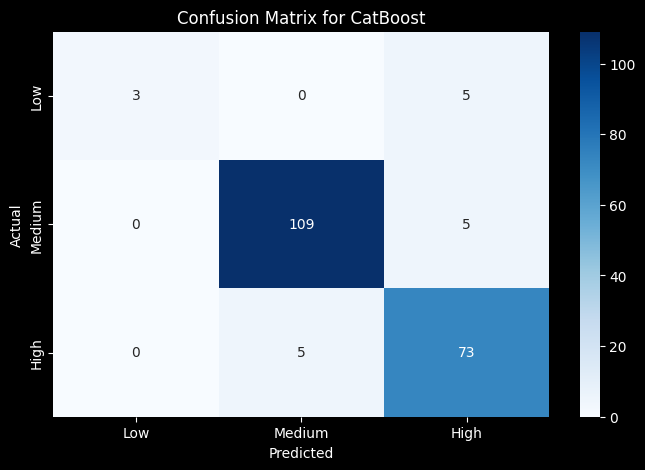


CatBoost - Classification Report:
               precision    recall  f1-score   support

         Low       1.00      0.38      0.55         8
      Medium       0.96      0.96      0.96       114
        High       0.88      0.94      0.91        78

    accuracy                           0.93       200
   macro avg       0.95      0.76      0.80       200
weighted avg       0.93      0.93      0.92       200



In [98]:
# CatBoost
catboost_params = best_results_df.loc[best_results_df['Model'] == 'CatBoost', 'Best Params'].values[0]
models['CatBoost'].set_params(**catboost_params)
models['CatBoost'] = train_and_evaluate_model(models['CatBoost'], 'CatBoost', X_train_resampled, y_train_resampled, X_test, y_test)


GradientBoosting - Training Accuracy: 1.000
GradientBoosting - Test Accuracy: 0.810
GradientBoosting - Training Precision: 1.000
GradientBoosting - Test Precision: 0.807
GradientBoosting - Training Recall: 1.000
GradientBoosting - Test Recall: 0.810
GradientBoosting - Training F1 Score: 1.000
GradientBoosting - Test F1 Score: 0.808

GradientBoosting - Confusion Matrix:
 [[  3   0   5]
 [  0 101  13]
 [  4  16  58]]


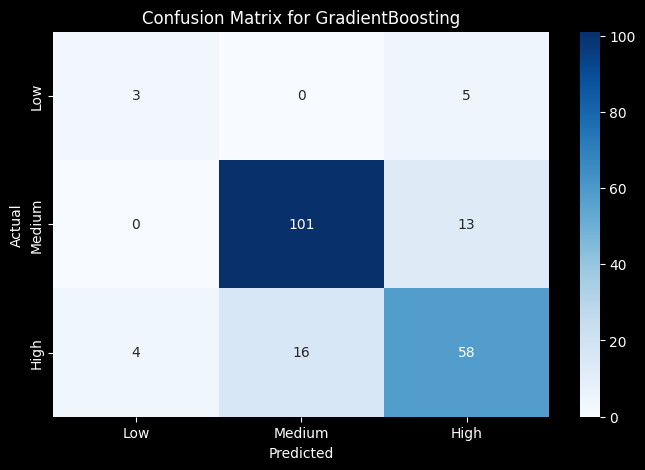


GradientBoosting - Classification Report:
               precision    recall  f1-score   support

         Low       0.43      0.38      0.40         8
      Medium       0.86      0.89      0.87       114
        High       0.76      0.74      0.75        78

    accuracy                           0.81       200
   macro avg       0.68      0.67      0.68       200
weighted avg       0.81      0.81      0.81       200



In [99]:
# Gradient Boosting
gradient_boosting_params = best_results_df.loc[best_results_df['Model'] == 'GradientBoosting', 'Best Params'].values[0]
models['GradientBoosting'].set_params(**gradient_boosting_params)
models['GradientBoosting'] = train_and_evaluate_model(models['GradientBoosting'], 'GradientBoosting', X_train_resampled, y_train_resampled, X_test, y_test)


AdaBoost - Training Accuracy: 0.762
AdaBoost - Test Accuracy: 0.875
AdaBoost - Training Precision: 0.861
AdaBoost - Test Precision: 0.905
AdaBoost - Training Recall: 0.762
AdaBoost - Test Recall: 0.875
AdaBoost - Training F1 Score: 0.755
AdaBoost - Test F1 Score: 0.875

AdaBoost - Confusion Matrix:
 [[ 4  0  4]
 [ 0 93 21]
 [ 0  0 78]]


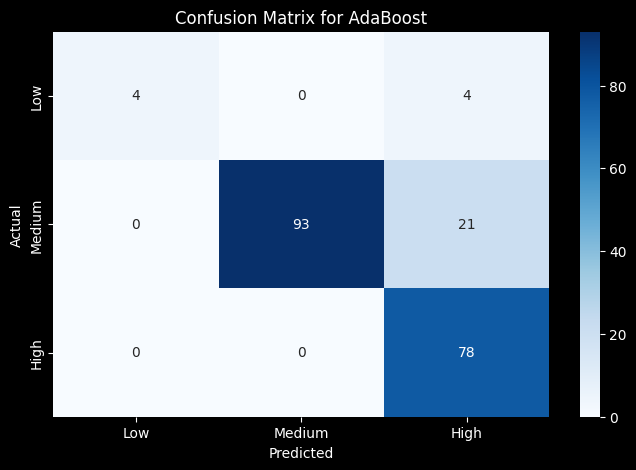


AdaBoost - Classification Report:
               precision    recall  f1-score   support

         Low       1.00      0.50      0.67         8
      Medium       1.00      0.82      0.90       114
        High       0.76      1.00      0.86        78

    accuracy                           0.88       200
   macro avg       0.92      0.77      0.81       200
weighted avg       0.91      0.88      0.87       200



In [100]:
# AdaBoost
adaboost_params = {'learning_rate': 1, 'n_estimators': 200}
models['AdaBoost'].set_params(**adaboost_params)
models['AdaBoost'] = train_and_evaluate_model(models['AdaBoost'], 'AdaBoost', X_train_resampled, y_train_resampled, X_test, y_test)


NaiveBayes - Training Accuracy: 0.720
NaiveBayes - Test Accuracy: 0.715
NaiveBayes - Training Precision: 0.719
NaiveBayes - Test Precision: 0.750
NaiveBayes - Training Recall: 0.720
NaiveBayes - Test Recall: 0.715
NaiveBayes - Training F1 Score: 0.719
NaiveBayes - Test F1 Score: 0.726

NaiveBayes - Confusion Matrix:
 [[ 5  0  3]
 [ 1 95 18]
 [17 18 43]]


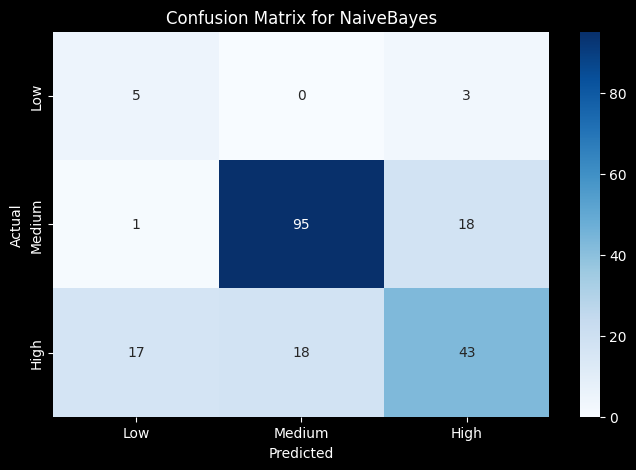


NaiveBayes - Classification Report:
               precision    recall  f1-score   support

         Low       0.22      0.62      0.32         8
      Medium       0.84      0.83      0.84       114
        High       0.67      0.55      0.61        78

    accuracy                           0.71       200
   macro avg       0.58      0.67      0.59       200
weighted avg       0.75      0.71      0.73       200



In [101]:
# Naive Bayes
naive_bayes_params = best_results_df.loc[best_results_df['Model'] == 'NaiveBayes', 'Best Params'].values[0]
models['NaiveBayes'].set_params(**naive_bayes_params)
models['NaiveBayes'] = train_and_evaluate_model(models['NaiveBayes'], 'NaiveBayes', X_train_resampled, y_train_resampled, X_test, y_test)

In [102]:
metrics_df_balanced = pd.DataFrame(metrics_dict).T  
metrics_df_balanced = metrics_df_balanced.sort_values(by=['Test F1', 'Test Accuracy'], ascending=False)
metrics_df_balanced

,Train Accuracy,Train Precision,Train Recall,Train F1,Test Accuracy,Test Precision,Test Recall,Test F1
CatBoost,1.000000,1.000000,1.000000,1.000000,0.925,0.928012,0.925,0.920483
XGBoost,1.000000,1.000000,1.000000,1.000000,0.895,0.888222,0.895,0.890798
LGBM,1.000000,1.000000,1.000000,1.000000,0.900,0.866512,0.900,0.882439
AdaBoost,0.761589,0.861004,0.761589,0.754704,0.875,0.905340,0.875,0.874973
SVC,1.000000,1.000000,1.000000,1.000000,0.875,0.873050,0.875,0.872172
RandomForest,1.000000,1.000000,1.000000,1.000000,0.865,0.835660,0.865,0.848813
GradientBoosting,1.000000,1.000000,1.000000,1.000000,0.810,0.806826,0.810,0.808208
DecisionTree,1.000000,1.000000,1.000000,1.000000,0.755,0.756775,0.755,0.755827
KNN,1.000000,1.000000,1.000000,1.000000,0.745,0.745777,0.745,0.744436
NaiveBayes,0.720383,0.718704,0.720383,0.719481,0.715,0.749930,0.715,0.726193


In [103]:
# Assuming metrics_df contains the evaluation metrics and is sorted by performance
# Get the name of the best model
# Get the metrics for the best model
best_model_name = metrics_df_balanced.index[0]  
best_model_metrics = metrics_df_balanced.loc[best_model_name]  
print(f"The best model is: {best_model_name}")
print(f"Metrics for {best_model_name}:")
print(f"  Training Accuracy: {best_model_metrics['Train Accuracy']:.2f}")
print(f"  Training Precision: {best_model_metrics['Train Precision']:.2f}")
print(f"  Training Recall: {best_model_metrics['Train Recall']:.2f}")
print(f"  Training F1 Score: {best_model_metrics['Train F1']:.2f}")
print(f"  Test Accuracy: {best_model_metrics['Test Accuracy']:.2f}")
print(f"  Test Precision: {best_model_metrics['Test Precision']:.2f}")
print(f"  Test Recall: {best_model_metrics['Test Recall']:.2f}")
print(f"  Test F1 Score: {best_model_metrics['Test F1']:.2f}")

The best model is: CatBoost
Metrics for CatBoost:
  Training Accuracy: 1.00
  Training Precision: 1.00
  Training Recall: 1.00
  Training F1 Score: 1.00
  Test Accuracy: 0.93
  Test Precision: 0.93
  Test Recall: 0.93
  Test F1 Score: 0.92


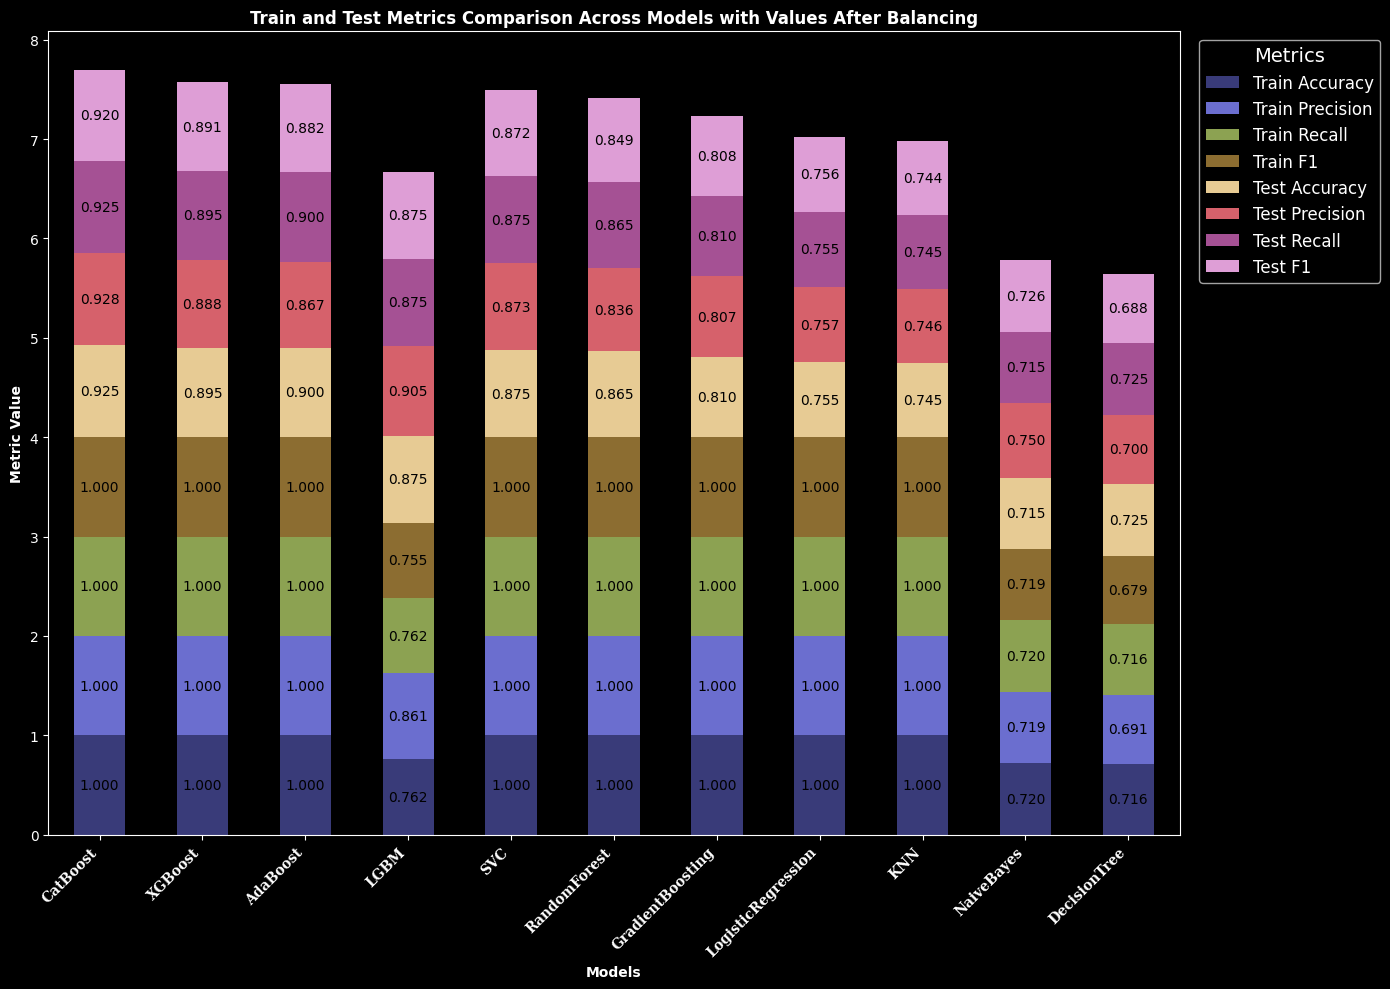

In [104]:
ax = metrics_df_balanced.plot(kind="bar", stacked=True, figsize=(14, 10), colormap="tab20b")
# Annotate bar values at the center
for container in ax.containers:
    for bar in container:
        if bar.get_height() > 0: 
            ax.text(bar.get_x() + bar.get_width() / 2,bar.get_y() + bar.get_height() / 2,f"{bar.get_height():.3f}",
                ha="center",va="center",fontsize=10,color="black")
# Add titles and labels
plt.title("Train and Test Metrics Comparison Across Models with Values After Balancing", fontsize=12, weight='bold')
plt.xlabel("Models", fontsize=10, weight='bold')
plt.ylabel("Metric Value", fontsize=10, weight='bold')
plt.xticks(rotation=45, ha="right")
ax.set_xticklabels(metrics_df.index, fontdict=font_properties, rotation=45, ha='right')
plt.legend(title="Metrics", bbox_to_anchor=(1.01, 1), loc="upper left", fontsize=12,title_fontsize=14)
plt.tight_layout()
plt.show()

In [105]:
### Save Best Model
with open(f'{best_model_name}_smote_model.pkl', 'wb') as file:
    pickle.dump(models[best_model_name], file)
with open(f'{best_model_name}_smote_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
print(f"The model '{best_model_name}' has been loaded successfully.")
print(type(loaded_model))

The model 'CatBoost' has been loaded successfully.
<class 'catboost.core.CatBoostClassifier'>
